In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from statsmodels.graphics import utils
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [3]:
df_1 = pd.read_csv("properties_2016.csv")
df_2 = pd.read_csv("train_2016_v2.csv")
df_1 = df_1.set_index("parcelid")
df_2 = df_2.set_index("parcelid")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = pd.concat([df_2, df_1], join='inner', axis=1)

In [5]:
feature_info = pd.DataFrame(columns = ['x','missing_ratio','dtype', 'unique_value_counts'])
feature_info['x'] = df.columns
feature_info['missing_ratio'] = [(len(df) - len(df[x].dropna()))/len(df) for x in df.columns]
feature_info['dtype'] = [df[x].dtypes for x in df.columns]
feature_info['unique_value_counts'] = [len(df[x].unique()) for x in df.columns]
feature_info.sort_values('missing_ratio', inplace=True)
feature_info.reset_index(drop=True).iloc[1:,:]

x  missing_ratio    dtype  unique_value_counts
1                      longitude       0.000000  float64                71900
2          propertylandusetypeid       0.000000  float64                   14
3         rawcensustractandblock       0.000000  float64                42647
4                 regionidcounty       0.000000  float64                    3
5                        roomcnt       0.000000  float64                   17
6                       latitude       0.000000  float64                73312
7                           fips       0.000000  float64                    3
8                     bedroomcnt       0.000000  float64                   17
9                    bathroomcnt       0.000000  float64                   23
10                assessmentyear       0.000000  float64                    1
11               transactiondate       0.000000   object                  352
12         landtaxvaluedollarcnt       0.000011  float64                57067
13     propertycountylandusecode       0.000011   object                   78
14             taxvaluedollarcnt       0.000011  float64                55939
15                     taxamount       0.000066  float64                85111
16                   regionidzip       0.000388  float64                  389
17    structuretaxvaluedollarcnt       0.004209  float64                55451
18           censustractandblock       0.006702  float64                42399
19  calculatedfinishedsquarefeet       0.007322  float64                 5103
20                     yearbuilt       0.008374  float64                  131
21                   fullbathcnt       0.013093  float64                   15
22             calculatedbathnbr       0.013093  float64                   23
23                  regionidcity       0.019972  float64                  178
24          finishedsquarefeet12       0.051831  float64                 4983
25             lotsizesquarefeet       0.112434  float64                20017
26                       unitcnt       0.353608  float64                   11
27            propertyzoningdesc       0.354052   object                 1997
28         buildingqualitytypeid       0.364564  float64                    9
29         heatingorsystemtypeid       0.378787  float64                   13
30          regionidneighborhood       0.601086  float64                  495
31                  garagecarcnt       0.668380  float64                   16
32               garagetotalsqft       0.668380  float64                  871
33         airconditioningtypeid       0.681185  float64                    7
34               numberofstories       0.772141  float64                    5
35                       poolcnt       0.801706  float64                    2
36                   pooltypeid7       0.815043  float64                    2
37           threequarterbathnbr       0.866973  float64                    5
38                  fireplacecnt       0.893581  float64                    6
39      finishedfloor1squarefeet       0.924054  float64                 1887
40          finishedsquarefeet50       0.924054  float64                 1899
41          finishedsquarefeet15       0.960521  float64                 1916
42            yardbuildingsqft17       0.970690  float64                  568
43                hashottuborspa       0.973802   object                    2
44            taxdelinquencyflag       0.980249   object                    2
45            taxdelinquencyyear       0.980249  float64                   12
46                   pooltypeid2       0.986663  float64                    2
47                  pooltypeid10       0.987139  float64                    2
48                   poolsizesum       0.989266  float64                  274
49                    decktypeid       0.992711  float64                    2
50           finishedsquarefeet6       0.995336  float64                  361
51        typeconstructiontypeid       0.996688  floa

In [6]:
# feature의 결측률과 unique한 값의 종류, 갯수를 볼 수 있는 함수
def unique(feature):
    print('{}'.format((90275 - len(df[feature].dropna()))/90275)+'%')
    print(df[feature].unique())
    print(df.groupby([feature]).size().reset_index(name="Counts"))

In [7]:
numerical = []
categorical = []

# logerror

In [8]:
#오래된 집일수록 예측하기 힘들돠~

# taxvaluedollarcnt = landtaxvaluedollarcnt + structuretaxvaluedollarcnt

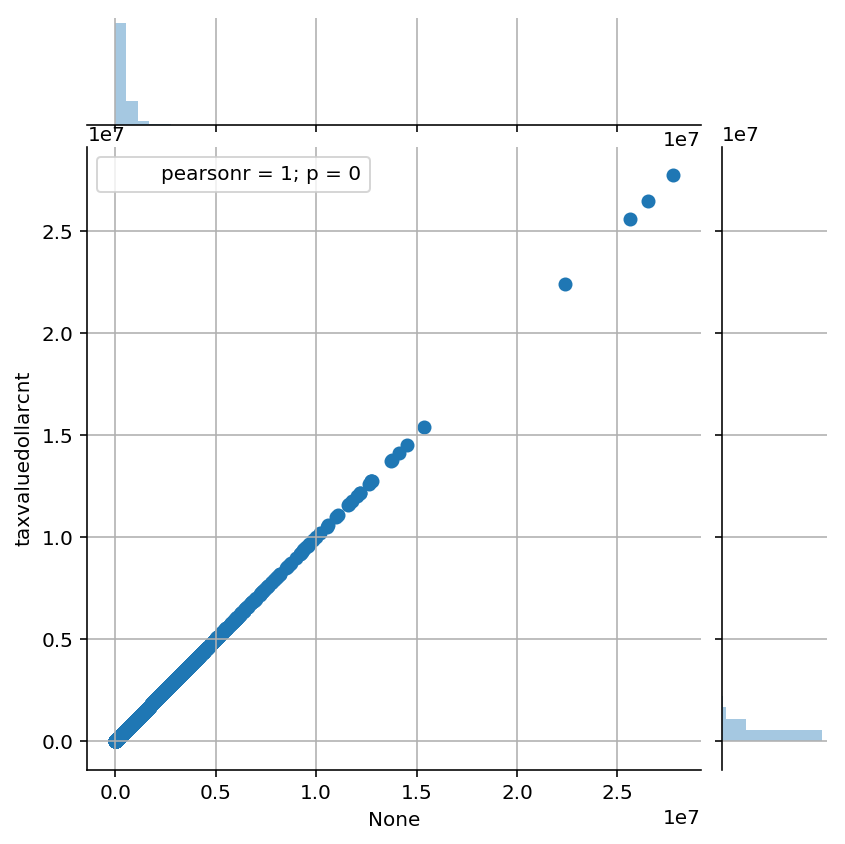

In [9]:
sns.jointplot(x=df['structuretaxvaluedollarcnt']+df['landtaxvaluedollarcnt'], y=df['taxvaluedollarcnt'])
plt.show()

# taxamount

In [10]:
unique('taxamount')

6.646358349487677e-05%
[ 6735.88 10153.02 11484.48 ...  1886.54  1925.7   2285.57]
       taxamount  Counts
0          49.08       1
1          51.40       1
2          64.00       1
3          85.96       1
4          96.74       1
5         102.02       1
6         108.98       1
7         126.28       1
8         126.72       1
9         133.32       1
10        150.16       1
11        150.87       1
12        165.84       1
13        165.90       2
14        165.92       1
15        165.96       1
16        181.22       1
17        184.66       1
18        189.08       1
19        193.40       1
20        200.42       1
21        212.22       1
22        221.00       2
23        226.30       1
24        233.33       1
25        236.86       1
26        240.90       1
27        243.41       1
28        244.11       1
29        252.32       1
...          ...     ...
85080  116985.07       1
85081  119642.02       1
85082  121315.68       1
85083  121804.86       1
85084  124097.41 

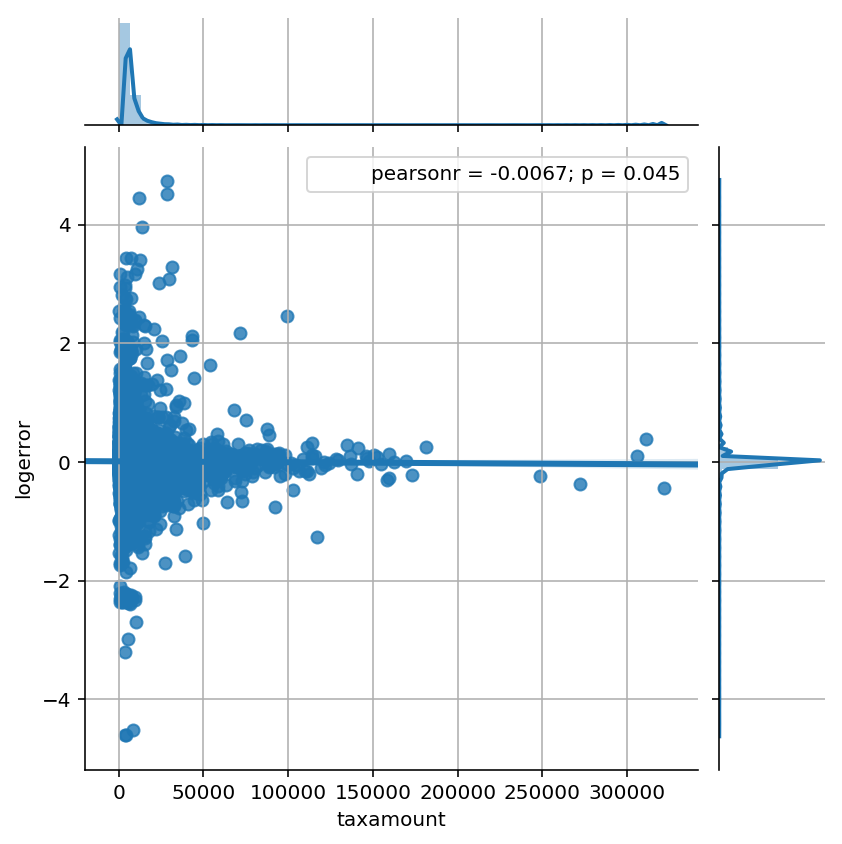

In [11]:
sns.jointplot(x=df['taxamount'], y=df['logerror'], kind='reg')
plt.show()

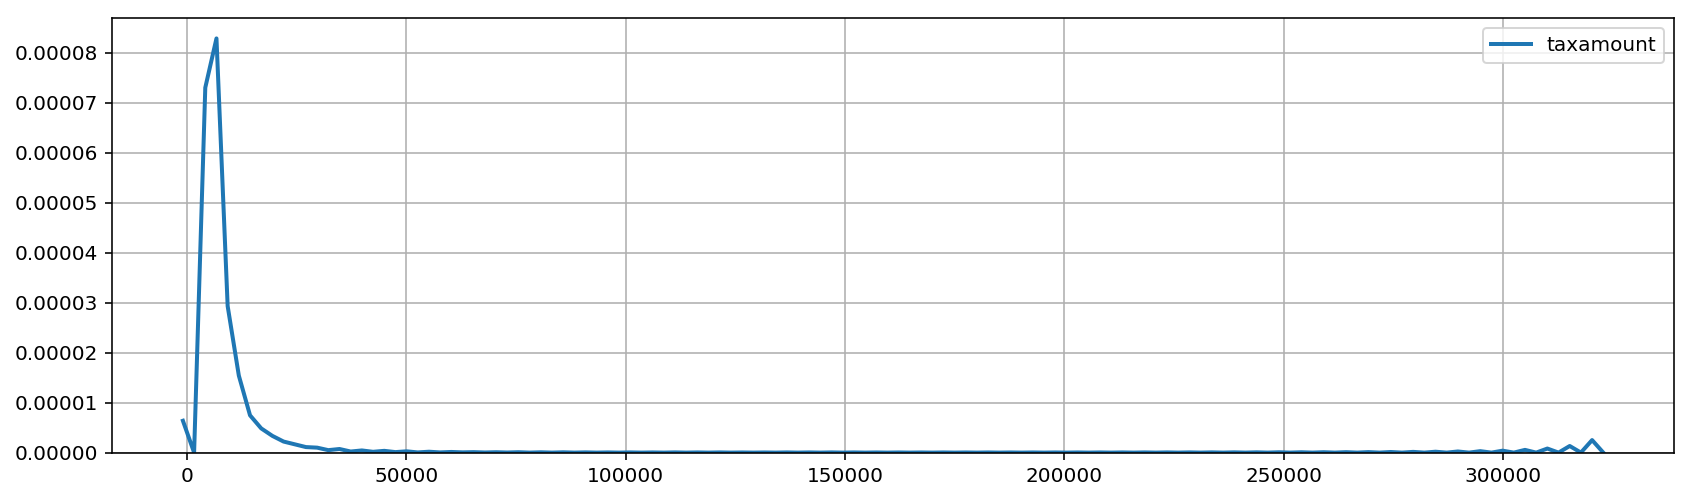

In [12]:
sns.kdeplot(df['taxamount'].dropna())
plt.show()

In [13]:
df['taxamount'].fillna(df['taxamount'].mean(), inplace=True)

In [14]:
numerical.append('taxamount')

# taxdelinquencyyear

In [15]:
unique('taxdelinquencyyear')

0.9802492384381057%
[nan 13. 15. 12. 14. 10.  9.  8. 11.  7.  6. 99.]
    taxdelinquencyyear  Counts
0                  6.0       3
1                  7.0       8
2                  8.0      24
3                  9.0      63
4                 10.0      89
5                 11.0      85
6                 12.0     154
7                 13.0     210
8                 14.0     628
9                 15.0     518
10                99.0       1


In [16]:
df['taxdelinquencyyear'].replace(99, -1, inplace=True)
df['taxdelinquencyyear'] = 16 - df['taxdelinquencyyear']

In [17]:
unique('taxdelinquencyyear')

0.9802492384381057%
[nan  3.  1.  4.  2.  6.  7.  8.  5.  9. 10. 17.]
    taxdelinquencyyear  Counts
0                  1.0     518
1                  2.0     628
2                  3.0     210
3                  4.0     154
4                  5.0      85
5                  6.0      89
6                  7.0      63
7                  8.0      24
8                  9.0       8
9                 10.0       3
10                17.0       1


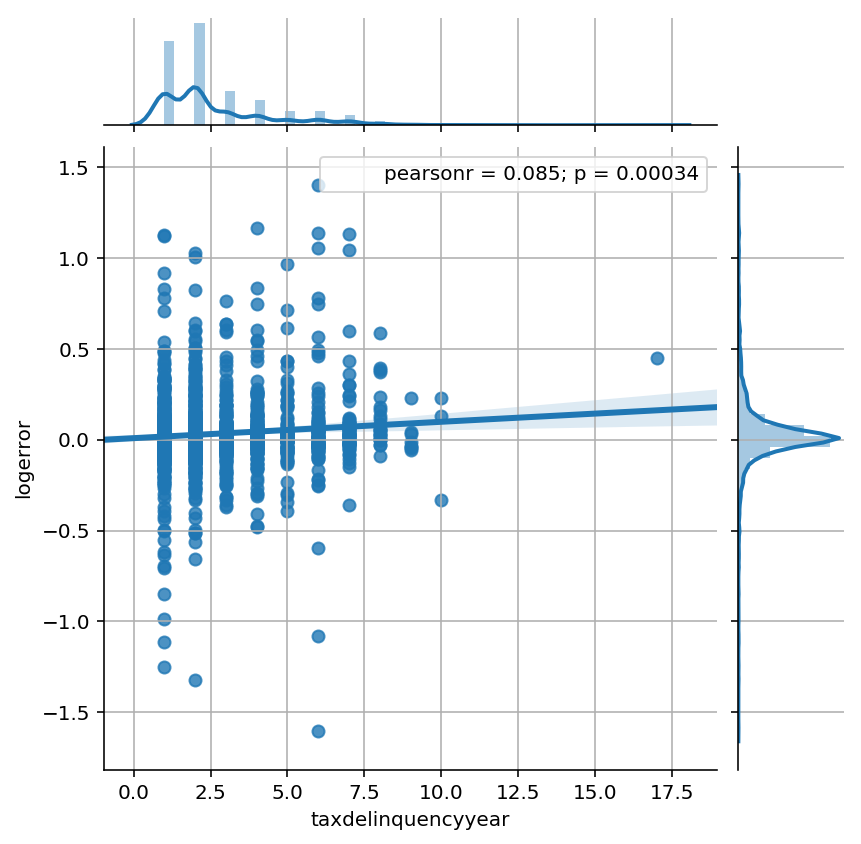

In [18]:
sns.jointplot(x = df['taxdelinquencyyear'], y = df['logerror'], kind='reg')
plt.show()

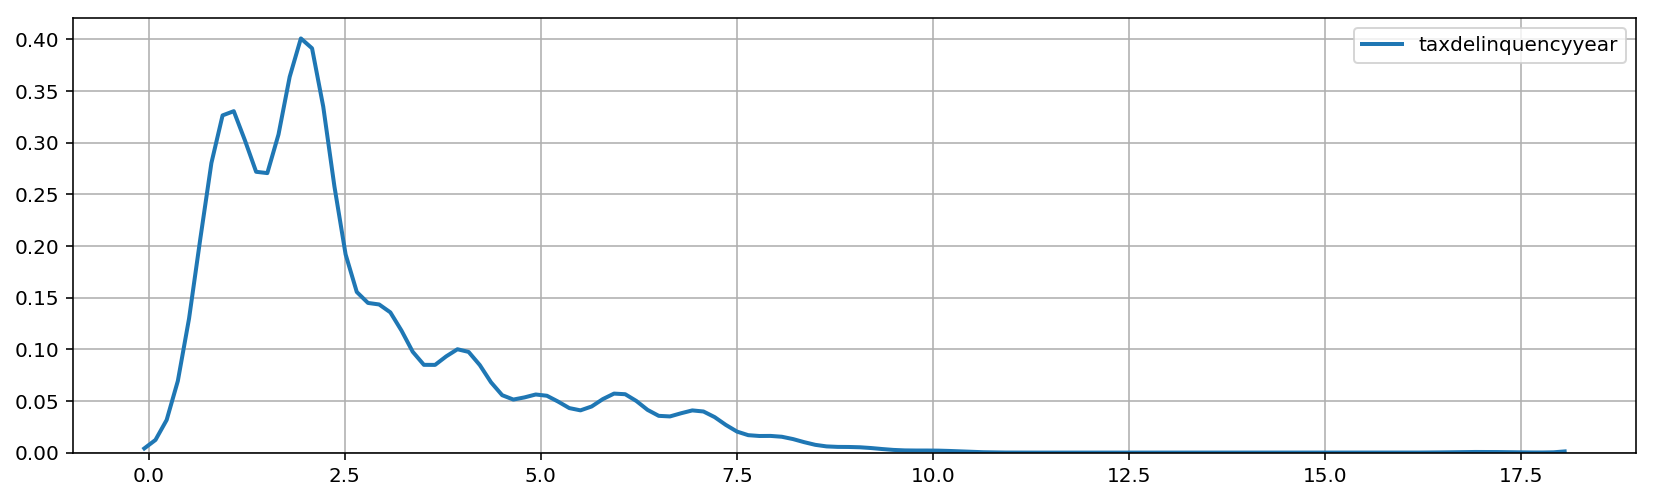

In [19]:
sns.kdeplot(df['taxdelinquencyyear'].dropna())
plt.show()

In [20]:
df['taxdelinquencyyear'].fillna(0, inplace=True)

In [21]:
categorical.append('taxdelinquencyyear')

# taxdelinquencyflag

In [22]:
unique('taxdelinquencyflag')

0.9802492384381057%
[nan 'Y']
  taxdelinquencyflag  Counts
0                  Y    1783


In [23]:
df['taxdelinquencyflag'].fillna(0, inplace=True)

In [24]:
categorical.append('taxdelinquencyflag')

# landtaxvaluedollarcnt

In [25]:
df['landtaxvaluedollarcnt'].unique()

array([237416., 239071.,  57912., ..., 243265., 120020.,  32878.])

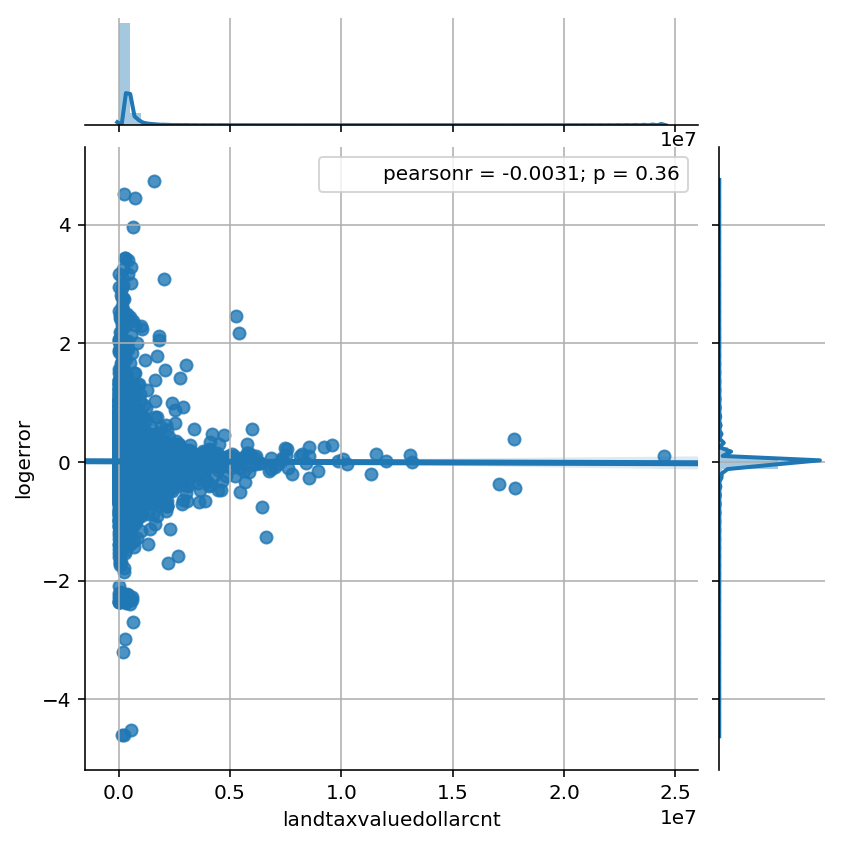

In [26]:
sns.jointplot(x= df['landtaxvaluedollarcnt'], y= df['logerror'], kind='reg')
plt.show()

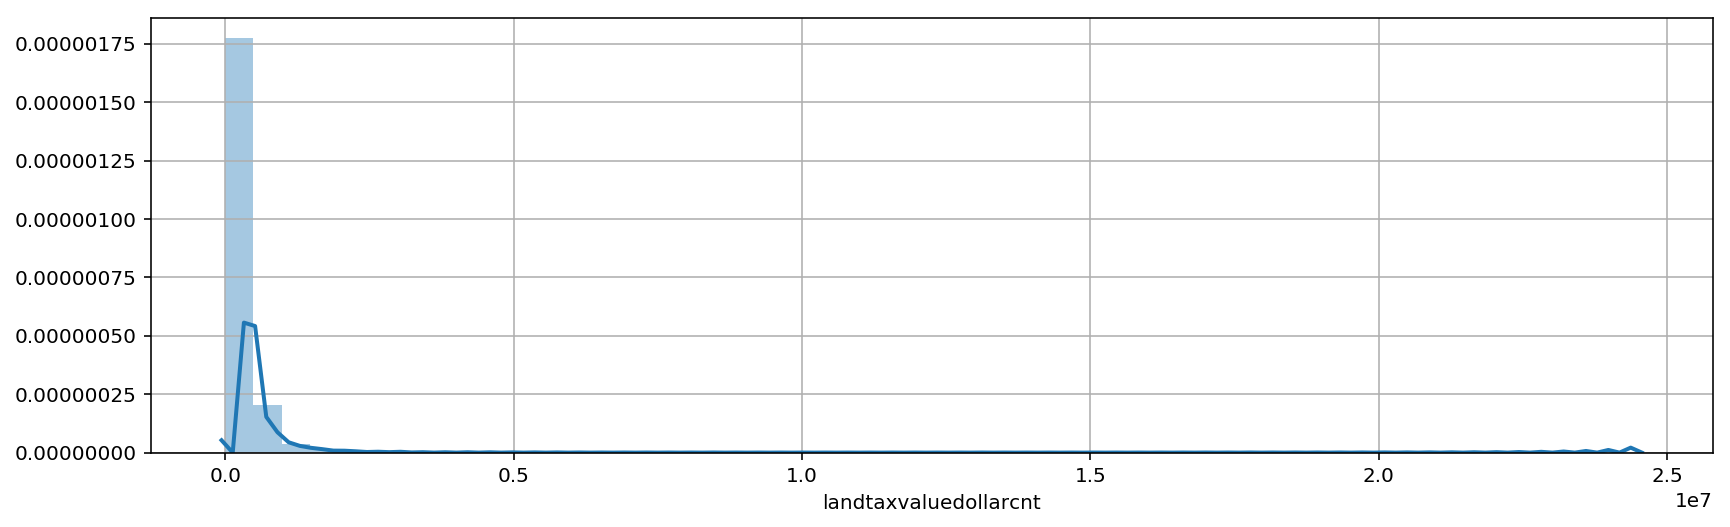

In [27]:
sns.distplot(df['landtaxvaluedollarcnt'].dropna())
plt.show()

In [28]:
df['landtaxvaluedollarcnt'].fillna(df['landtaxvaluedollarcnt'].mean(), inplace=True)

In [29]:
numerical.append('landtaxvaluedollarcnt')

# structuretaxvaluedollarcnt

In [30]:
unique('structuretaxvaluedollarcnt')

0.004209360288008862%
[122754. 346458.  61994. ... 180034. 192373. 132991.]
       structuretaxvaluedollarcnt  Counts
0                           100.0       3
1                           101.0       1
2                           104.0       1
3                           107.0       1
4                           113.0       1
5                           118.0       1
6                           137.0       1
7                           144.0       2
8                           146.0       1
9                           148.0       2
10                          509.0       1
11                          607.0       1
12                          796.0       1
13                         1000.0       4
14                         1019.0       1
15                         1024.0       2
16                         1044.0       1
17                         1179.0       1
18                         1239.0       1
19                         1319.0       1
20                         1387.0       1


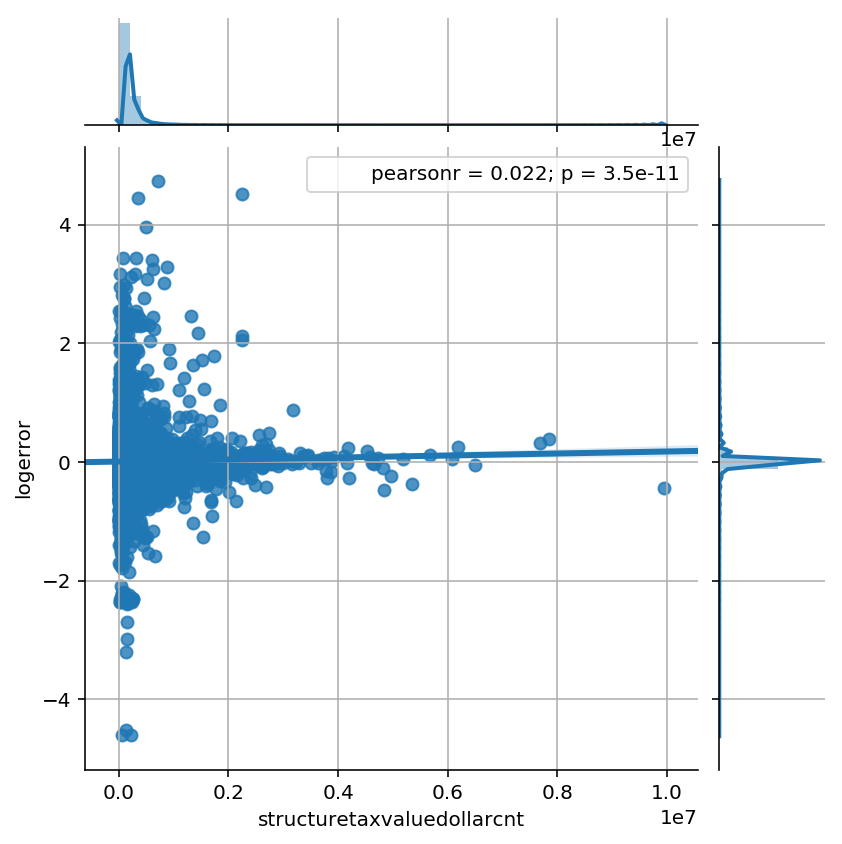

In [31]:
sns.jointplot(x=df['structuretaxvaluedollarcnt'], y=df['logerror'], kind='reg')
plt.show()

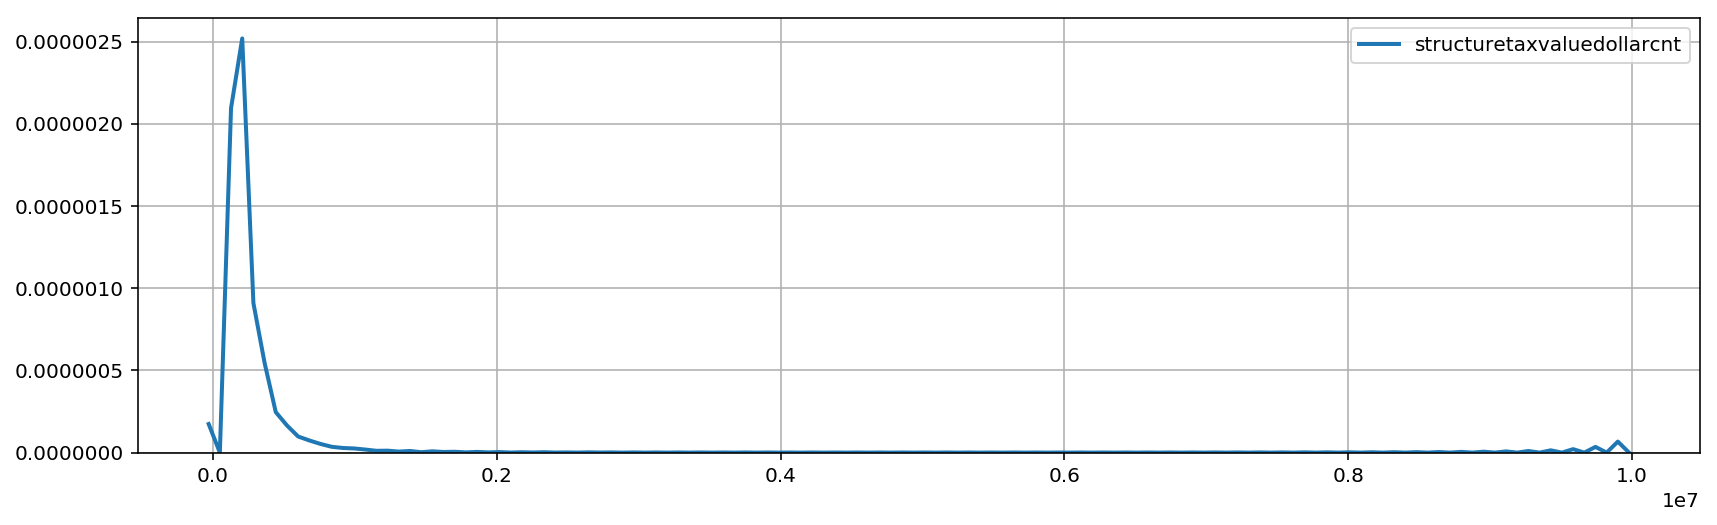

In [32]:
sns.kdeplot(df['structuretaxvaluedollarcnt'].dropna())
plt.show()

In [33]:
df['structuretaxvaluedollarcnt'].fillna(df['structuretaxvaluedollarcnt'].mean(), inplace=True)

In [34]:
numerical.append('structuretaxvaluedollarcnt')

# bathroomcnt = fullbathcnt, calculatedbatnbr 
# bathroomcnt = fullbathcnt + threequarterbathnbr

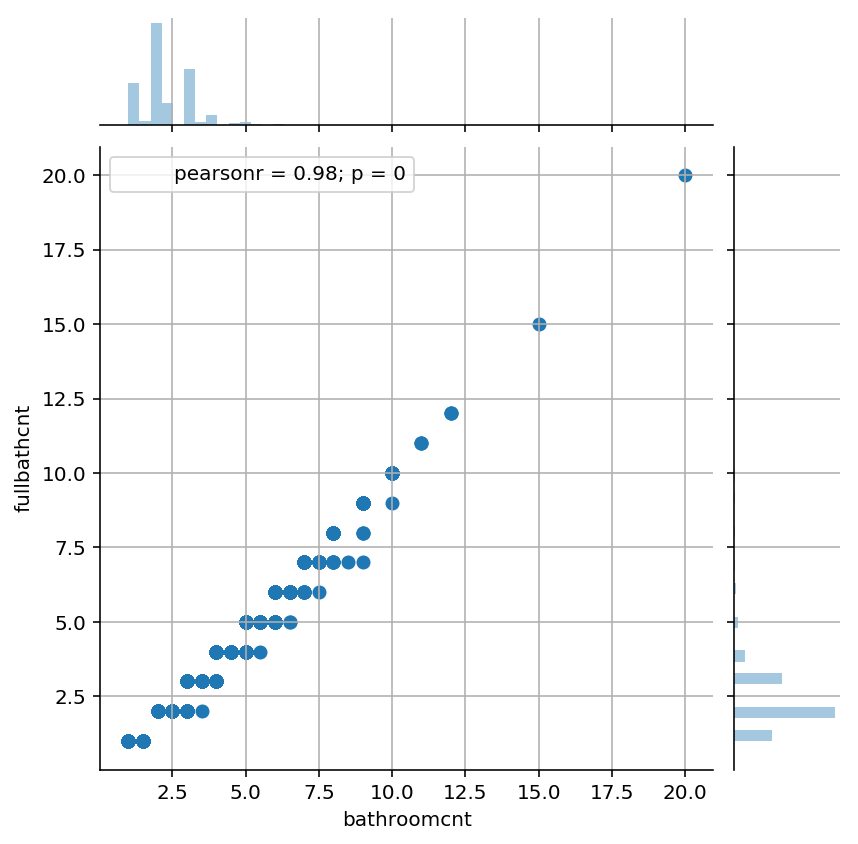

In [35]:
sns.jointplot(x=df['bathroomcnt'], y=df['fullbathcnt'])
plt.show()

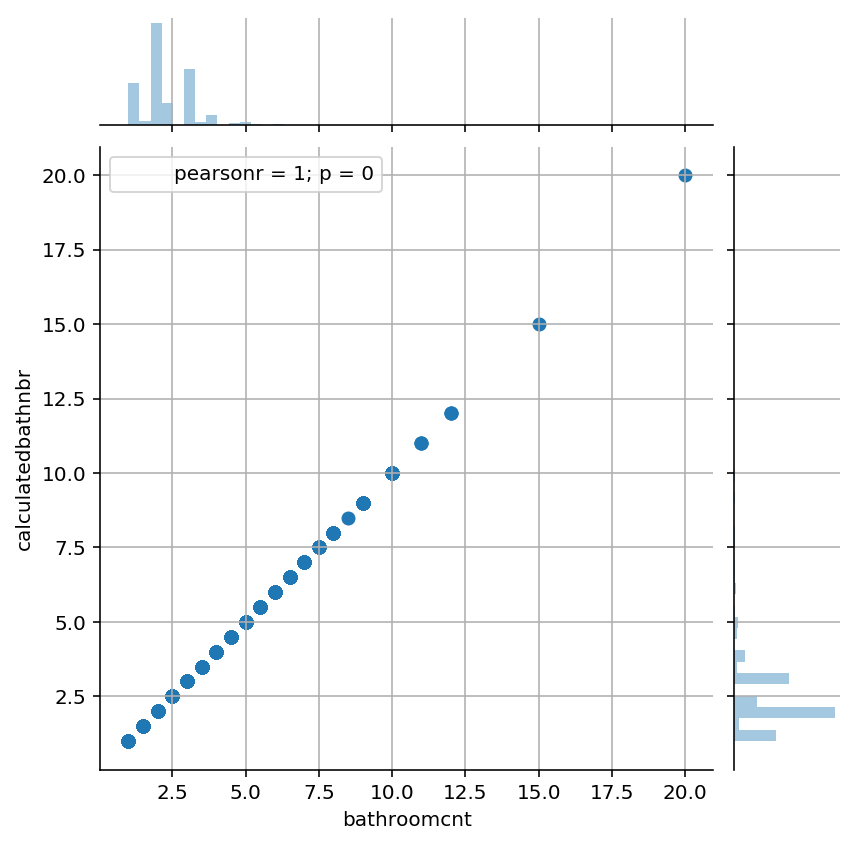

In [36]:
sns.jointplot(x=df['bathroomcnt'], y=df['calculatedbathnbr'])
plt.show()

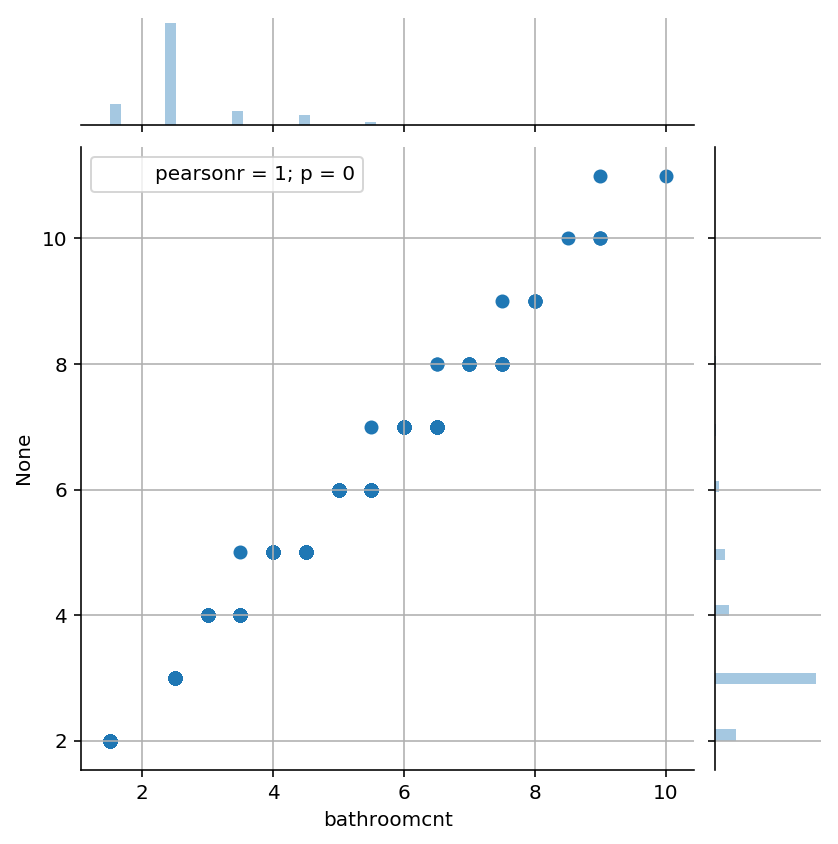

In [37]:
sns.jointplot(x=df['bathroomcnt'], y=df['fullbathcnt']+df['threequarterbathnbr'])
plt.show()

# bathroomcnt

In [38]:
unique('bathroomcnt')

0.0%
[ 2.   3.5  3.   2.5  4.   1.   5.   5.5  1.5  8.   0.   4.5  9.   7.
  6.  10.   6.5  7.5 12.  11.  20.   8.5 15. ]
    bathroomcnt  Counts
0           0.0    1165
1           1.0   15035
2           1.5    1641
3           2.0   36534
4           2.5    8091
5           3.0   19946
6           3.5    1091
7           4.0    3743
8           4.5     795
9           5.0    1142
10          5.5     253
11          6.0     448
12          6.5      54
13          7.0     155
14          7.5       9
15          8.0     114
16          8.5       1
17          9.0      36
18         10.0      14
19         11.0       3
20         12.0       3
21         15.0       1
22         20.0       1


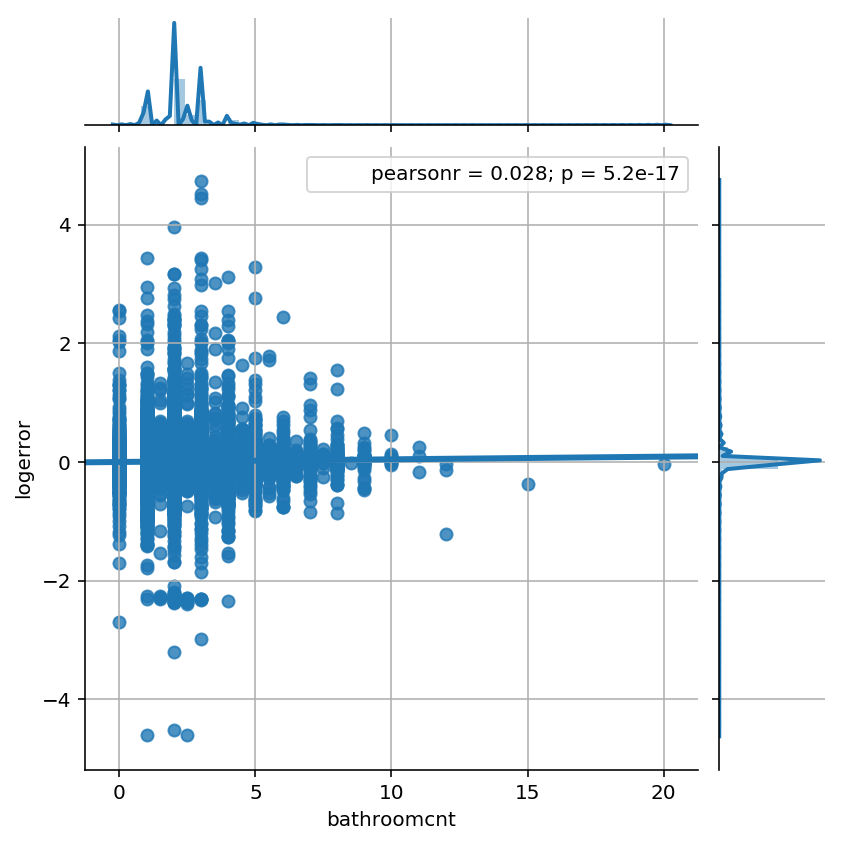

In [39]:
sns.jointplot(x=df['bathroomcnt'], y=df['logerror'], kind='reg')
plt.show()

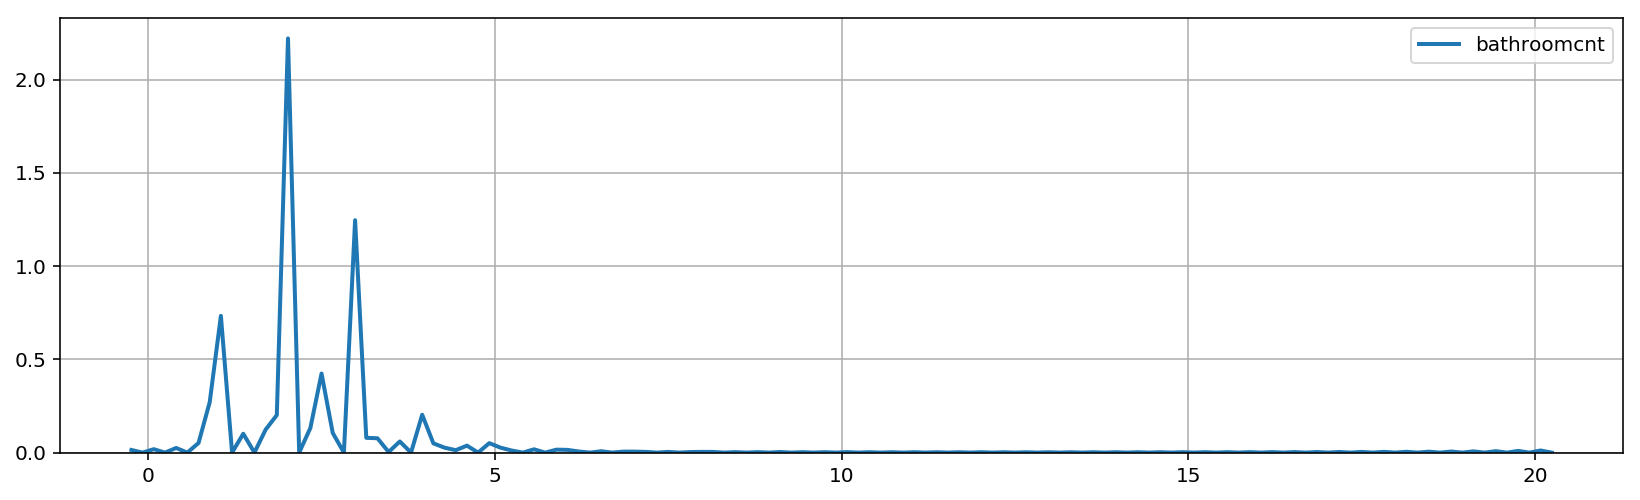

In [40]:
sns.kdeplot(df['bathroomcnt'].dropna())
plt.show()

In [41]:
numerical.append('bathroomcnt')

# propertycountylandusecode

In [42]:
unique('propertycountylandusecode')

1.1077263915812794e-05%
['0100' '1' '010C' '122' '1129' '34' '1128' '010E' '0104' '0101' '0200'
 '0700' '1111' '01DC' '010D' '1110' '0400' '012C' '010V' '1116' '01HC'
 '010G' '0300' '010F' '1117' '0103' '38' '1210' '0111' '010M' '96' '135'
 '0108' '1014' '1112' '0201' '0109' '1310' '010H' '1410' '1222' '1321'
 '1720' '1011' '1432' '0401' '0102' '012D' '73' '105' '0110' '100V' '0130'
 '8800' '0303' '0210' '1012' '1333' '0114' '01DD' '020G' '040A' '012E'
 '020M' '040V' '070D' '1200' '030G' '1722' '6050' '1421' '010' nan '200'
 '0' '1420' '0131' '0301']
   propertycountylandusecode  Counts
0                          0       1
1                        010       1
2                       0100   30846
3                       0101    7435
4                       0102       3
5                       0103     100
6                       0104     348
7                       0108      46
8                       0109      27
9                       010C   10264
10                      010D    2209

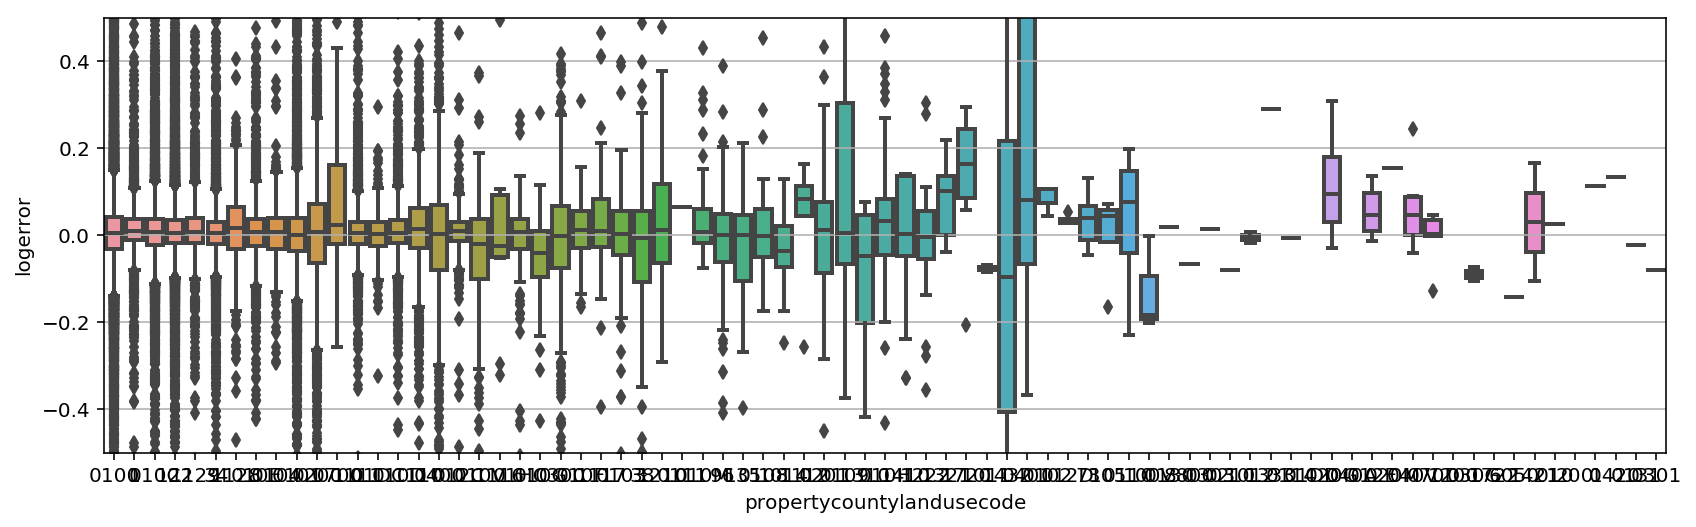

In [43]:
sns.boxplot(x=df['propertycountylandusecode'], y=df['logerror'])
plt.ylim(-0.5,0.5)
plt.show()

In [44]:
df['propertycountylandusecode'].fillna(df['propertycountylandusecode'].mode(), inplace=True)

In [45]:
categorical.append('propertycountylandusecode')

# regionidzip

In [46]:
unique('regionidzip')

0.0003877042370534478%
[ 96370.  96962.  96293.  96222.  96961.  96109.  96091.  97101.  96987.
  96963.  96426.  96120.  96437.  96947.  97035.  96964.  96393.  96238.
  96990.  96379.  96239.  97001.  97052.  96026.  97050.  96190.  97329.
  96349.  96374.  96088.  96242.  96008.  96361.  96364.  97007.  97078.
  96220.  97004.  96295.  97067.  96043.  97048.  96387.  96971.  96013.
  96505.  96506.  96513.  97008.  97041.  96978.  96097.  96133.  96324.
  96993.  96474.  97026.  96007.  96952.  97116.  96447.  96436.  97005.
  96384.  96475.  96383.  96996.  96986.  96072.  96107.  96965.  97020.
  96247.  97106.  96995.  97059.  96169.  96028.  96020.  96969.  96029.
  96351.  96974.  97083.  96183.  96957.  97107.  96420.  96193.  96058.
  97065.  97039.  96337.  96982.  96507.  97319.  96159.  96369.  96240.
  95984.  96268.  97091.  96282.  96090.  96284.  96173.  96045.  97024.
  96234.  97099.  97318.  96092.  96162.  97047.  96451.  96515.  95983.
  96989.  97344.  97023.  97

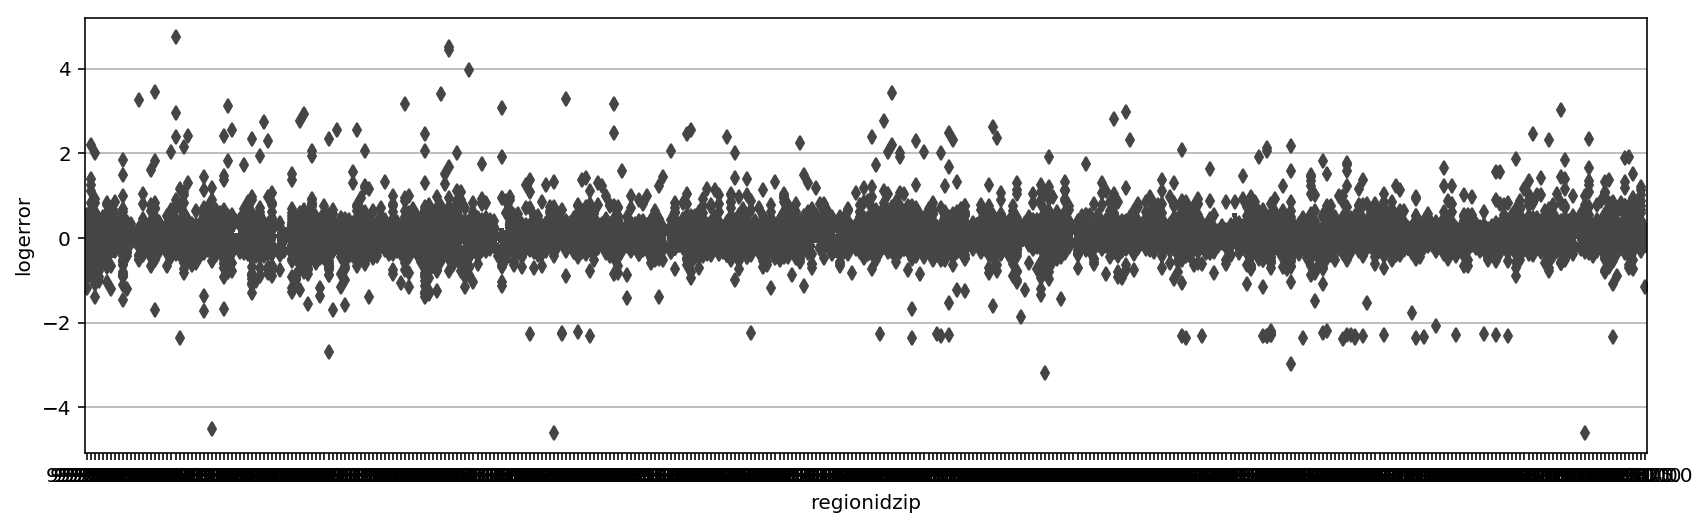

In [47]:
sns.boxplot(x=df['regionidzip'],y=df['logerror'])
plt.show()

In [48]:
df['regionidzip'].fillna(df['regionidzip'].mode()[0], inplace=True)

In [49]:
categorical.append('regionidzip')

# rawcensustractandblock
# censustractandblock
# fips
# regionidcounty

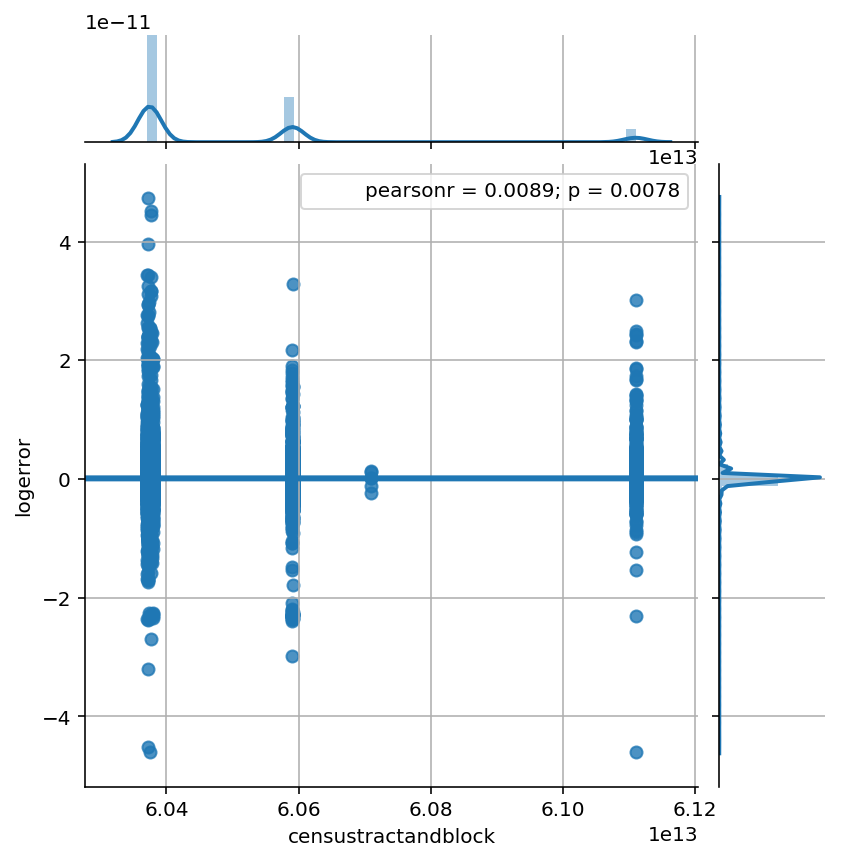

In [50]:
sns.jointplot(x=df['censustractandblock'], y=df['logerror'], kind='reg')
plt.show()

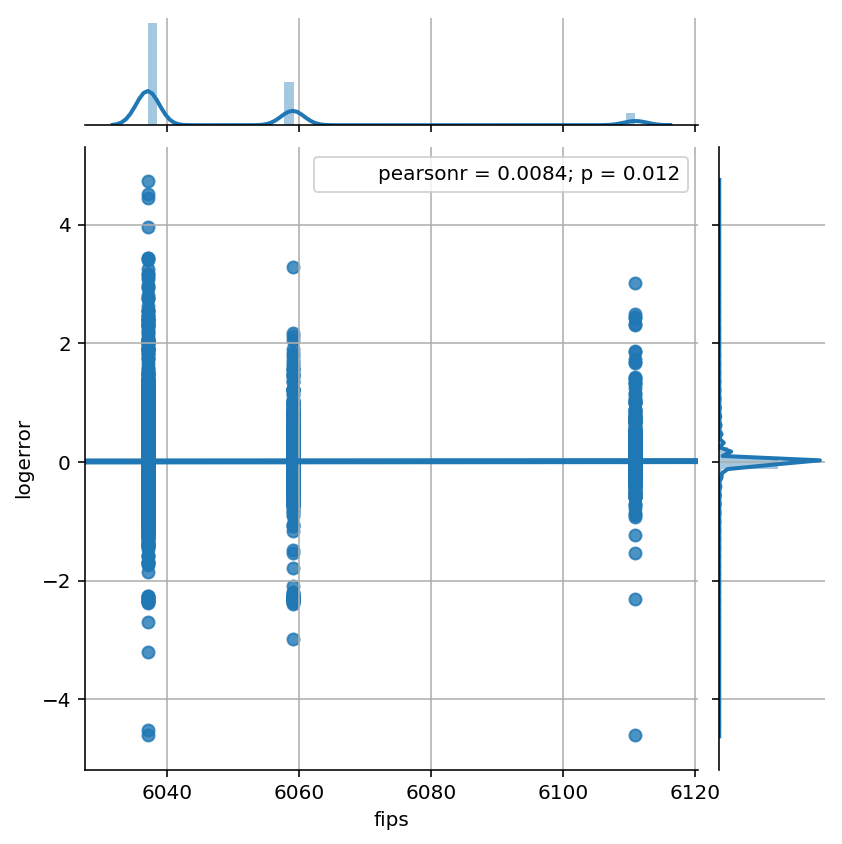

In [51]:
sns.jointplot(x=df['fips'], y=df['logerror'], kind='reg')
plt.show()

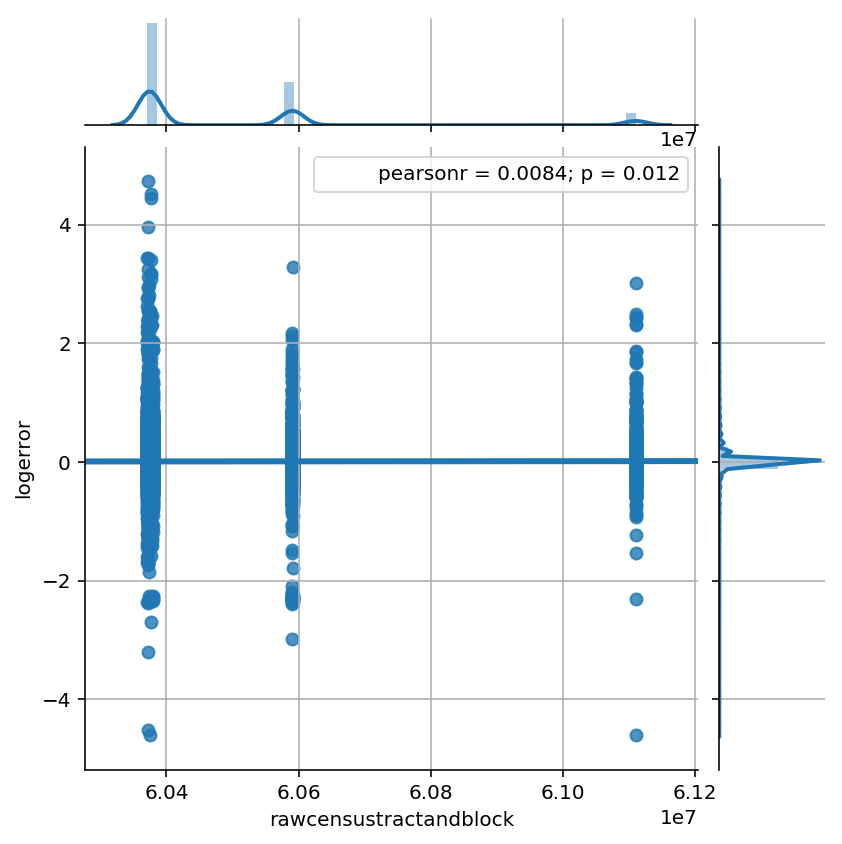

In [52]:
sns.jointplot(x=df['rawcensustractandblock'], y=df['logerror'], kind='reg')
plt.show()

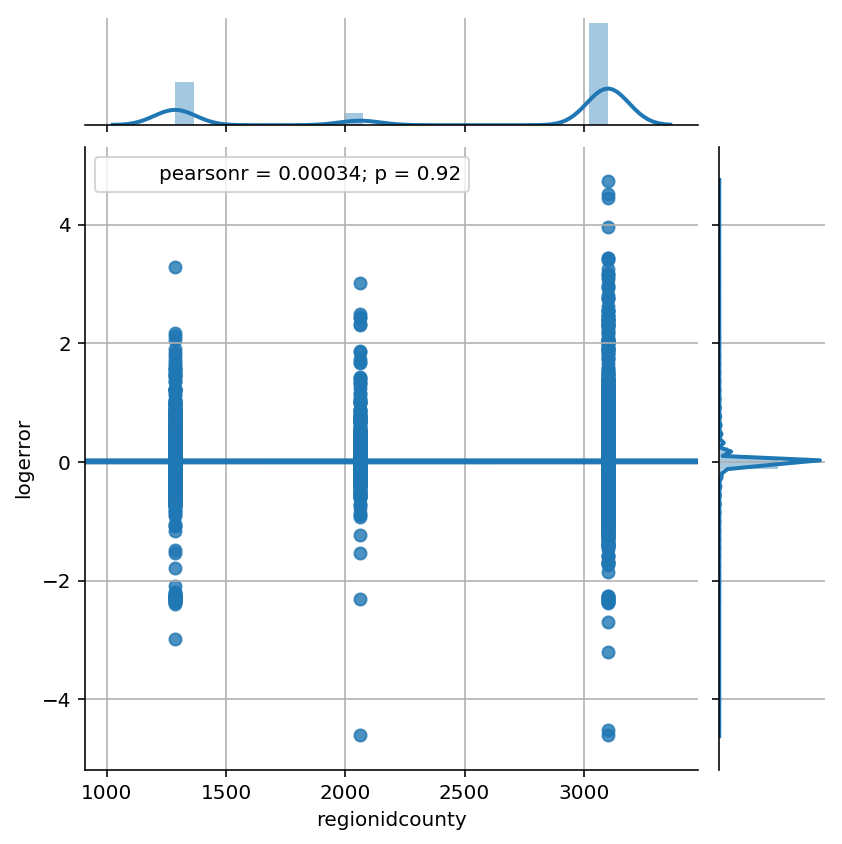

In [53]:
sns.jointplot(x=df['regionidcounty'], y=df['logerror'], kind='reg')
plt.show()

In [54]:
categorical.append('fips')

# poolcnt, pooltypeid7

In [55]:
unique('poolcnt')

0.8017058986430352%
[nan  1.]
   poolcnt  Counts
0      1.0   17901


In [56]:
unique('pooltypeid7')

0.8150429243976738%
[nan  1.]
   pooltypeid7  Counts
0          1.0   16697


In [57]:
(df.dropna()['poolcnt'] == df.dropna()['pooltypeid7']).all()

True

In [58]:
df['poolcnt'].fillna(0, inplace=True)

In [59]:
categorical.append('poolcnt')

# pooltypeid2

In [60]:
unique('pooltypeid2')

0.9866629742453614%
[nan  1.]
   pooltypeid2  Counts
0          1.0    1204


In [61]:
df['pooltypeid2'].fillna(0, inplace=True)

In [62]:
categorical.append('pooltypeid2')

# pooltypeid10

In [63]:
unique('pooltypeid10')

0.9871392965937413%
[nan  1.]
   pooltypeid10  Counts
0           1.0    1161


In [64]:
df['pooltypeid10'].fillna(0, inplace=True)

In [65]:
categorical.append('pooltypeid10')

# poolsizesum

In [66]:
unique('poolsizesum')

0.9892661312655774%
[  nan  475.  392.  664.  324.  385.  524.  400.  800.  434.  432.  403.
  416.  360.  380.  480.  608.  560.  377.  600.  450.  277.  500.  589.
  680.  714.  700.  555.  264.  547.  775.  684.  540.  492.  570.  648.
  422.  254.  505.  705.  755.  610.   49.  291.  420.  624.  550.  504.
  512.  440.  415.  288.  948.  612.  558.  510.  630.  666.  477.  576.
  536.  513.  343.  546.  971.  646.  406.  396.  356.  379.  830.  369.
  581.  304.  460.  382.  371.  627.  795.  583.  748.  336.  588.  518.
  580.  378.  465.  299.  448.  472.  412.  525.  216.  426. 1020.  544.
  404.  294.   28. 1052.  444. 1750.  442.  405.  428.  650.  838.  160.
  408.  908.  364.  490. 1125.  649.  702.  740.  750.  880.  585.  727.
  430.  164.  390.  384.  487.  567.  372.  419.  820.  640.  836.  435.
  535.  704.  528.  352.  200.  968.  312.  365.  425.  686.  665.  520.
  345.  489.  495.  250.  447.  720.  591.  556.  394.  386.  397.  350.
  456.  631. 1220.  468.  561. 

In [67]:
df['poolsizesum'].value_counts()

450.0     105
400.0      41
800.0      39
500.0      36
600.0      35
512.0      30
480.0      27
648.0      18
420.0      17
525.0      15
720.0      13
640.0      12
360.0      11
448.0      11
540.0      11
544.0      11
680.0      10
700.0       9
576.0       8
380.0       8
750.0       8
405.0       8
510.0       8
560.0       8
570.0       7
350.0       7
504.0       7
684.0       7
580.0       7
608.0       7
         ... 
40.0        1
647.0       1
815.0       1
558.0       1
276.0       1
290.0       1
461.0       1
1220.0      1
270.0       1
705.0       1
521.0       1
593.0       1
320.0       1
591.0       1
487.0       1
780.0       1
404.0       1
589.0       1
836.0       1
971.0       1
714.0       1
632.0       1
451.0       1
291.0       1
707.0       1
442.0       1
321.0       1
691.0       1
968.0       1
319.0       1
Name: poolsizesum, Length: 273, dtype: int64

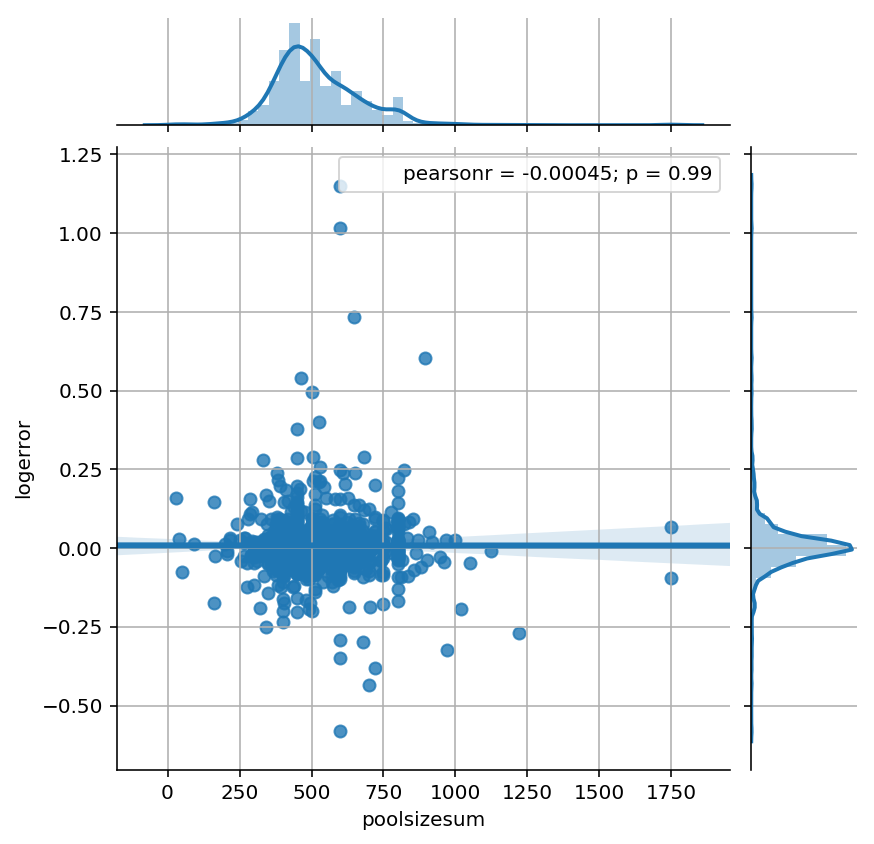

In [68]:
sns.jointplot(x=df['poolsizesum'], y=df['logerror'], kind='reg')
plt.show()

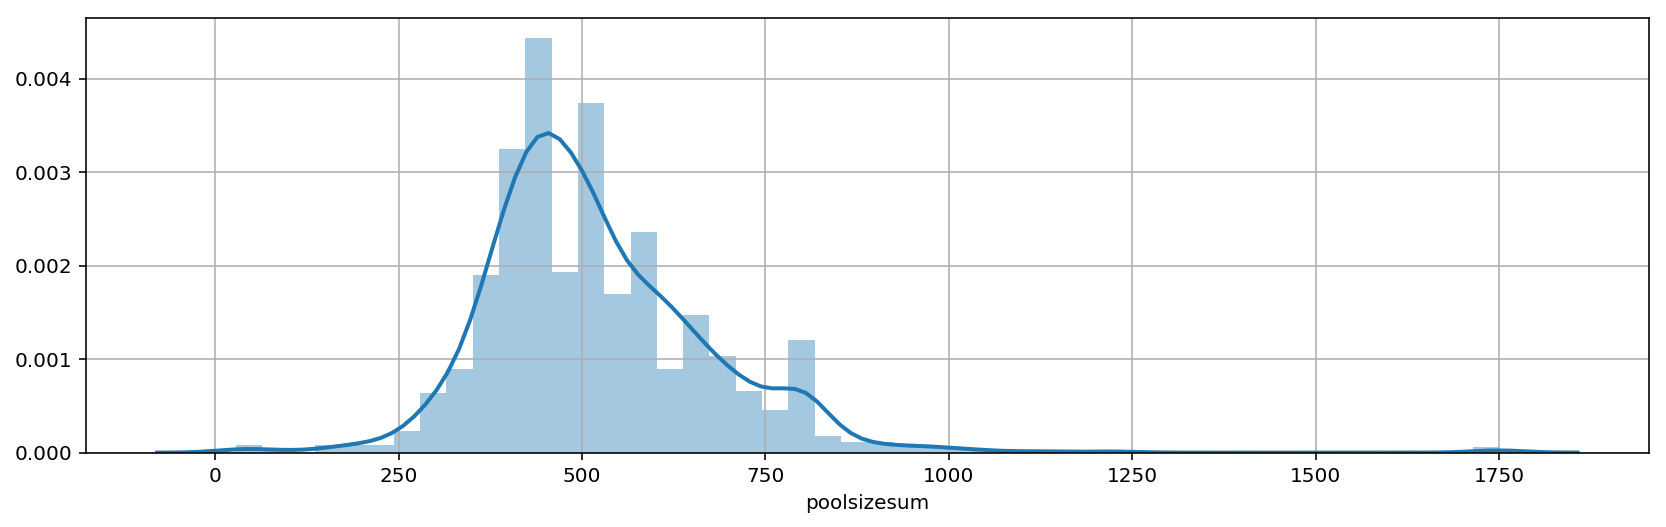

In [69]:
sns.distplot(df['poolsizesum'].dropna())
plt.show()

In [70]:
df['poolsizesum'].fillna(df['poolsizesum'].mean(), inplace=True)

In [71]:
numerical.append('poolsizesum')

# garagecarcnt

In [72]:
df['garagecarcnt'].value_counts()

2.0     21942
1.0      6679
3.0       663
0.0       290
4.0       262
5.0        54
6.0        16
7.0        11
8.0         7
9.0         6
11.0        2
10.0        2
13.0        1
24.0        1
14.0        1
Name: garagecarcnt, dtype: int64

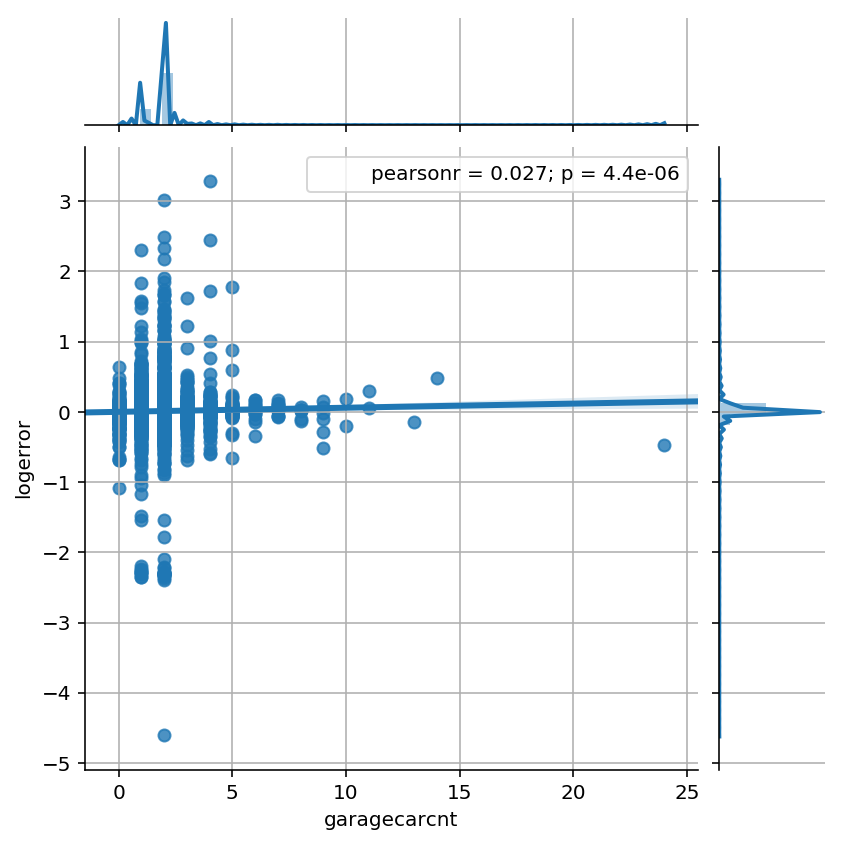

In [73]:
sns.jointplot(x=df['garagecarcnt'], y=df['logerror'], kind='reg')
plt.show()

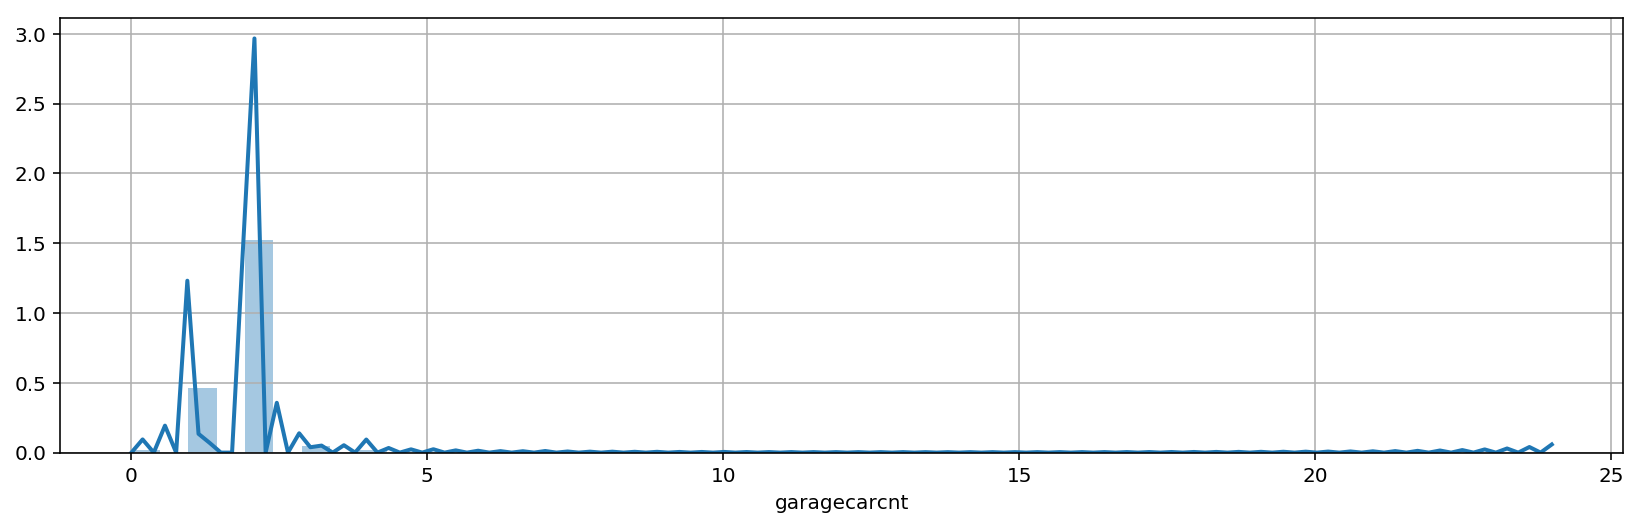

In [74]:
sns.distplot(df['garagecarcnt'].dropna())
plt.show()

In [75]:
df['garagecarcnt'].fillna(-1, inplace=True)

In [76]:
categorical.append('garagecarcnt')

# garagetotalsqft

In [77]:
unique('garagetotalsqft')

0.6683799501523123%
[  nan  468.  598.    0.  400.  471.  462.  437.  441.  401.  775.  380.
  440.  482.  595.  753.  350.  360.  300.  546.  453.  600.  339.  630.
  683.  438.  420.  495.  216.  483.  454.  436.  571.  450.  548.  651.
  385.  636.  481. 1025.  460.  609.  452.  761.  451.  585.  666. 1048.
  264.  988.  926.  827.  690.  648.  461.  413.  500.  410.  409.  480.
  470.  672.  687.  494.  619.  608.  435.  180.  620.  444.  457.  455.
  399.  498.  472.  242.  474.  662.  370.  518.  458.  708.  345.  824.
  484.  746.  442.  539.  448.  615.  456.  430.  504.  617.  358.  580.
  449.  445.  596.  660.  638.  625.  464.  336.  426.  234.  473.  491.
  631.  499.  670.  384.  700. 1000.  361.  510.  447.  469.  872.  421.
  613.  390.  635.  640.  493.  560.  466.  419.  415.  422.  588.  396.
  521.  733.  231.  340.  610.  402.  575.  492.  519.  576.  621.  379.
  689.  525.  520.  424.  834.  506.  280.  627.  532.  423.  501.  601.
 1674.  446.  728.  629.  606. 

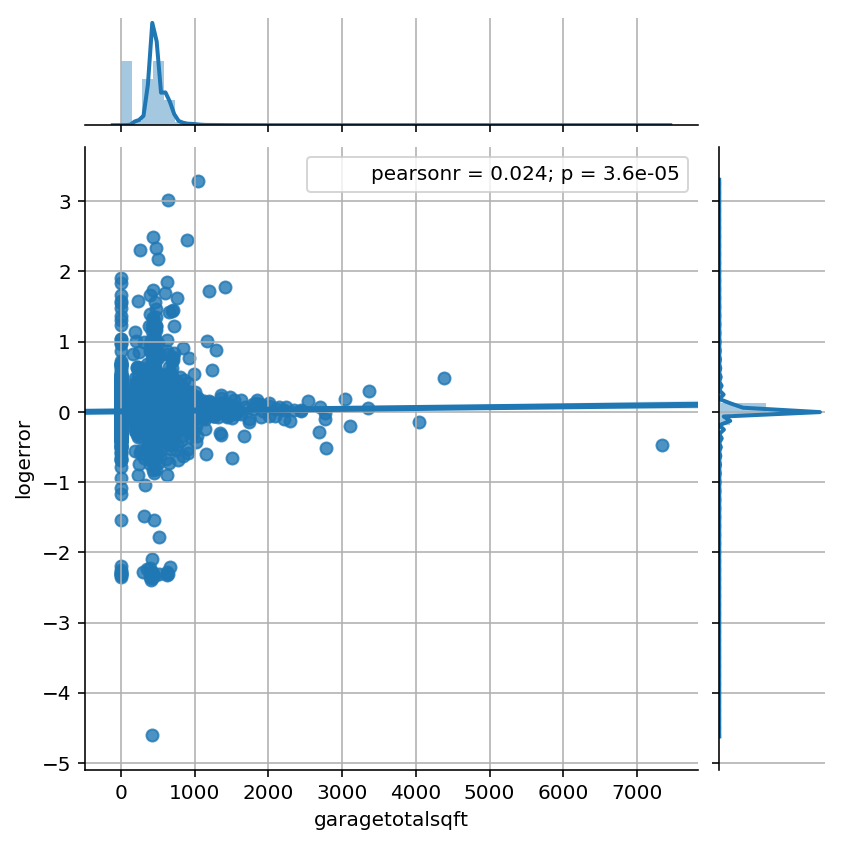

In [78]:
sns.jointplot(x=df['garagetotalsqft'], y=df['logerror'], kind='reg')
plt.show()

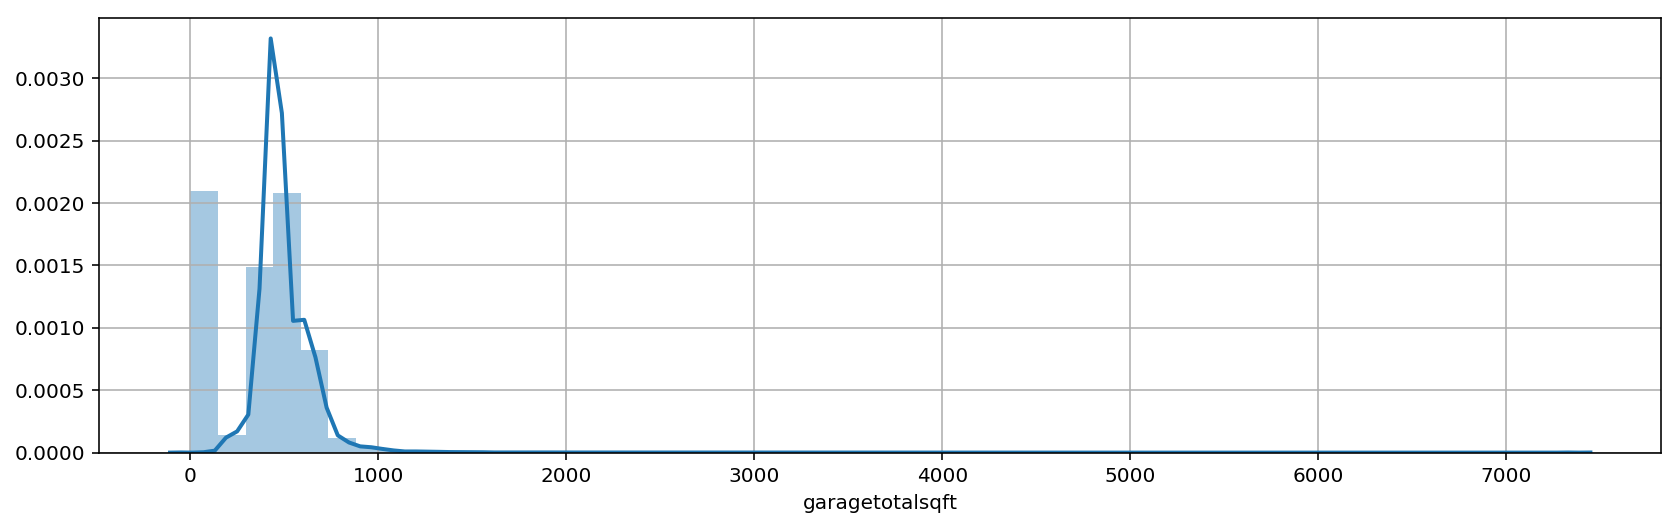

In [79]:
sns.distplot(df['garagetotalsqft'].dropna())
plt.show()

In [80]:
df['garagetotalsqft'].fillna(df['garagetotalsqft'].mean(), inplace=True)

In [81]:
numerical.append('garagetotalsqft')

# calculatedfinishedsquarefeet, finishedsquarefeet12, finishedsquarefeet50, finishedfloor1squarefeet

In [82]:
squarefeet = pd.DataFrame(df, columns=['calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet50', 'finishedfloor1squarefeet'])

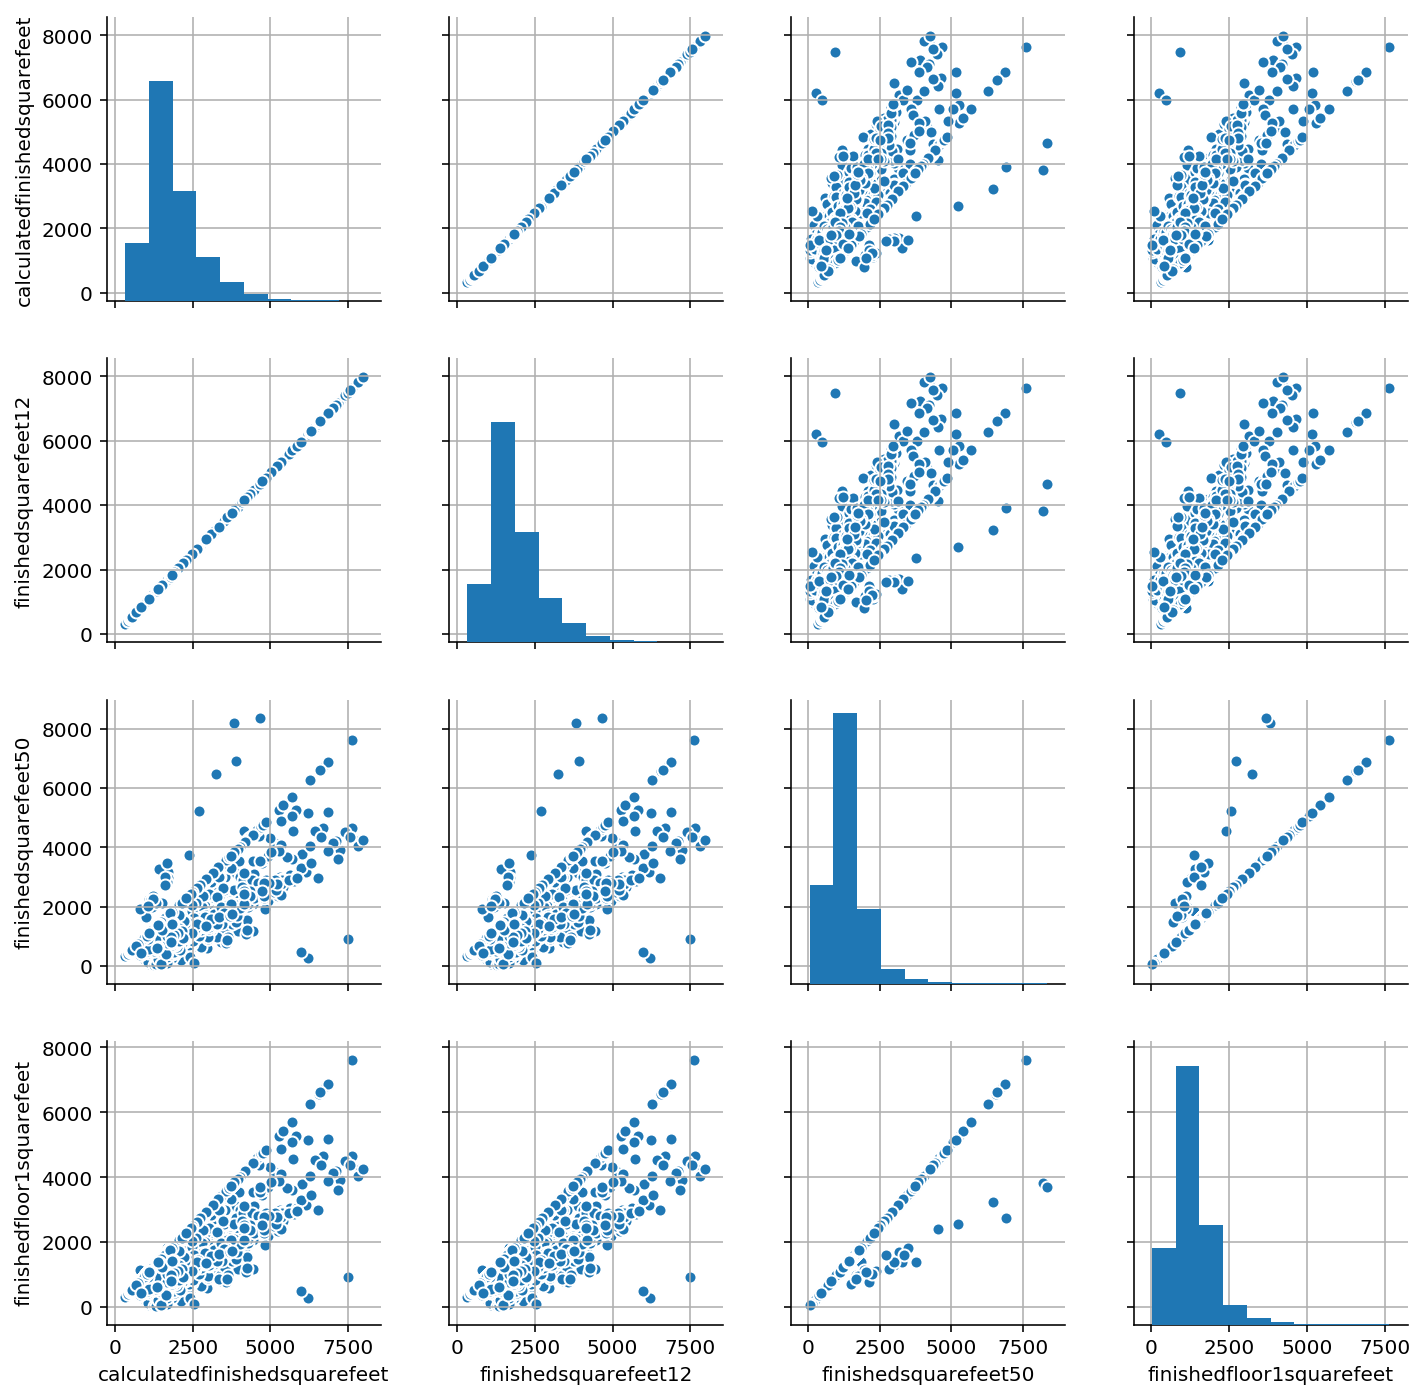

In [83]:
sns.pairplot(squarefeet.dropna())
plt.show()

# calculatedfinishedsquarefeet = finishedsquarefeet12

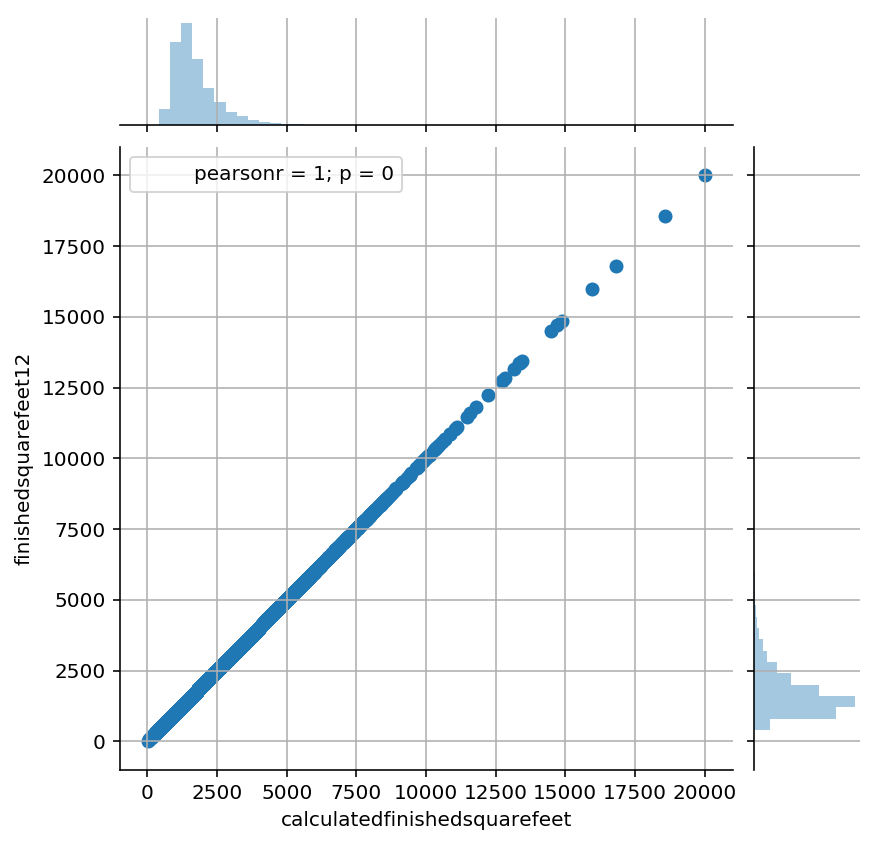

In [84]:
sns.jointplot(x=squarefeet['calculatedfinishedsquarefeet'], y=squarefeet['finishedsquarefeet12'])
plt.show()

In [85]:
df['calculatedfinishedsquarefeet'].fillna(df['calculatedfinishedsquarefeet'].mean(), inplace=True)

# finishedfloor1squarefeet = finishedsquarefeet50

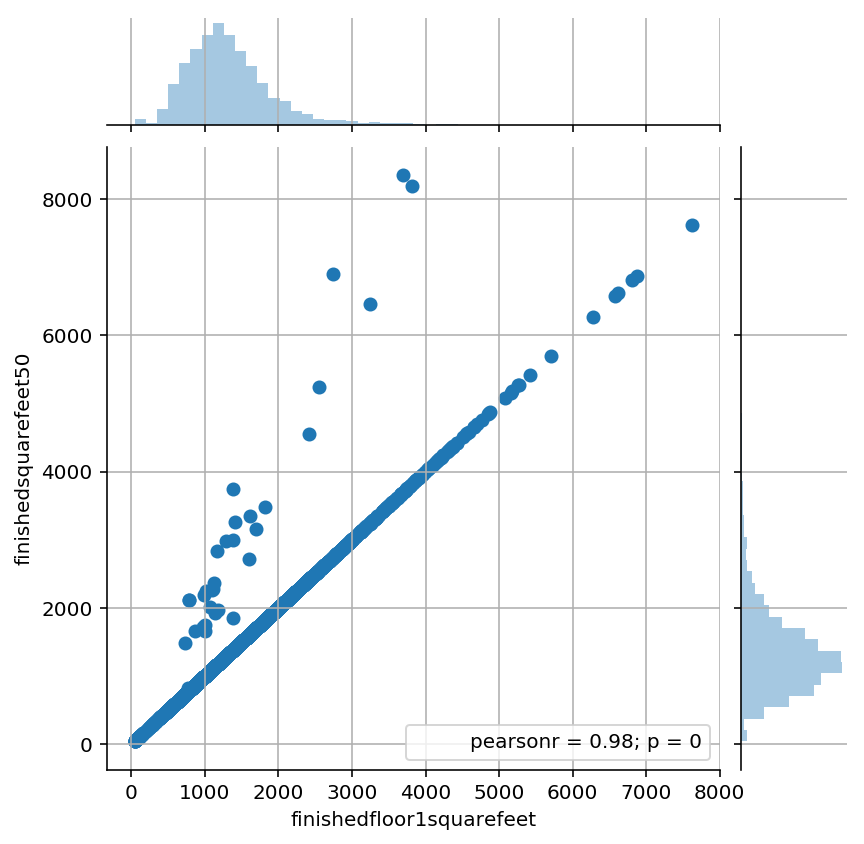

In [86]:
sns.jointplot(x=squarefeet['finishedfloor1squarefeet'], y=squarefeet['finishedsquarefeet50'])
plt.show()

In [87]:
df['finishedfloor1squarefeet'].fillna(df['finishedfloor1squarefeet'].mean(), inplace=True)

In [88]:
df['finishedsquarefeet50'].fillna(df['finishedsquarefeet50'].mean(), inplace=True)

In [89]:
numerical.append('finishedfloor1squarefeet')
numerical.append('finishedsquarefeet50')

# finishedsquarefeet15

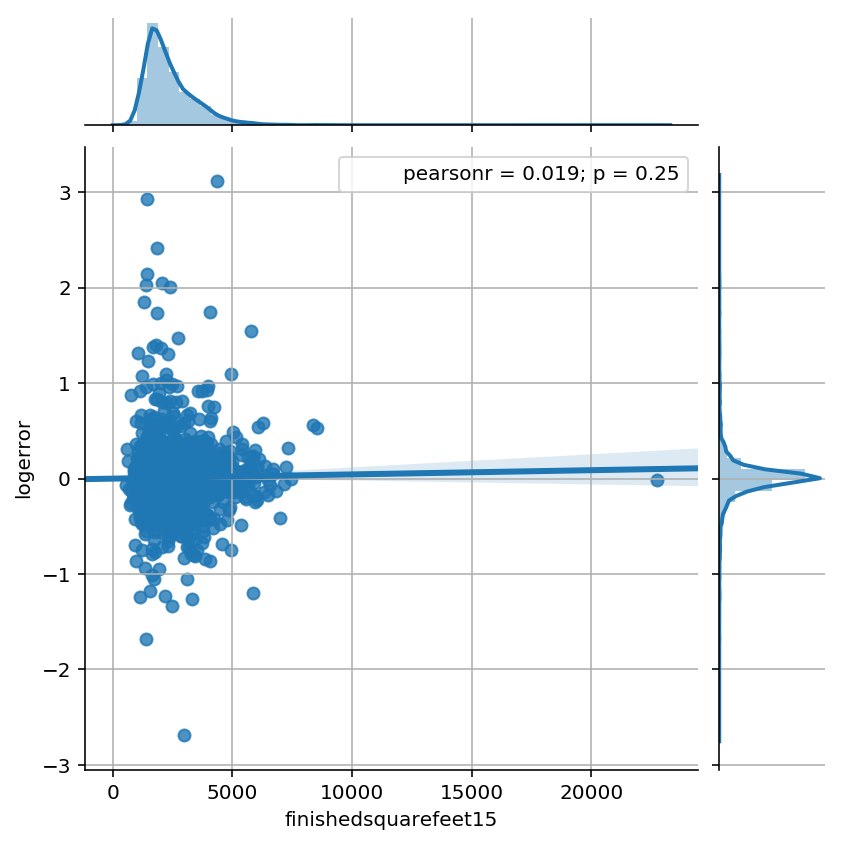

In [90]:
sns.jointplot(x=df['finishedsquarefeet15'], y=df['logerror'], kind='reg')
plt.show()

[]

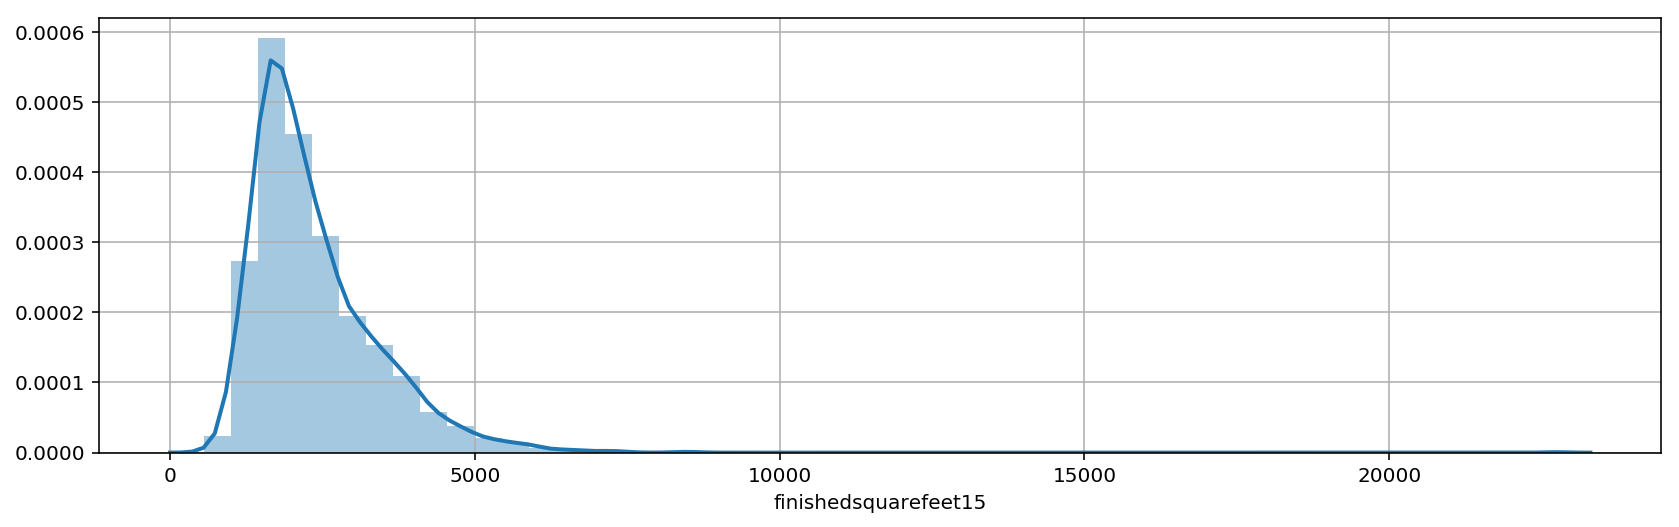

In [91]:
sns.distplot(df['finishedsquarefeet15'].dropna())
plt.plot()

In [92]:
df['finishedsquarefeet15'].fillna(df['finishedsquarefeet15'].mean(), inplace=True)

# finishedsquarefeet13

In [93]:
unique('finishedsquarefeet13')

0.9996344502907781%
[  nan 1392. 1440. 1536. 1344. 1566. 1464. 1152. 1584. 1248. 1416. 1056.]
    finishedsquarefeet13  Counts
0                 1056.0       1
1                 1152.0       1
2                 1248.0       3
3                 1344.0       3
4                 1392.0       2
5                 1416.0       1
6                 1440.0      17
7                 1464.0       1
8                 1536.0       2
9                 1566.0       1
10                1584.0       1


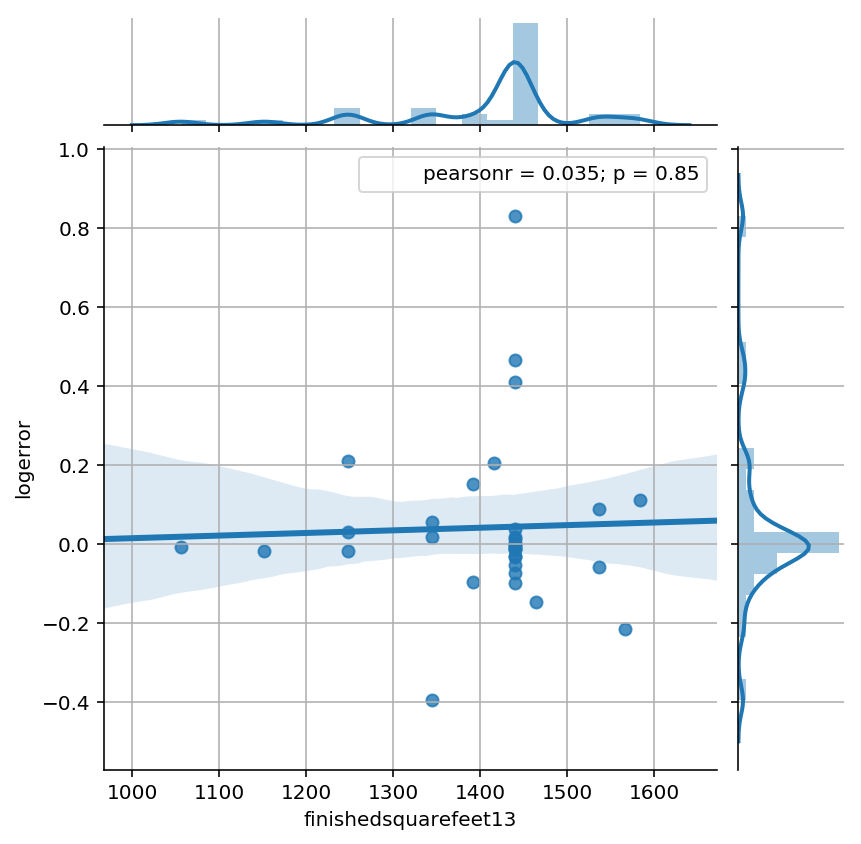

In [94]:
sns.jointplot(x=df['finishedsquarefeet13'], y=df['logerror'], kind='reg')
plt.show()

[]

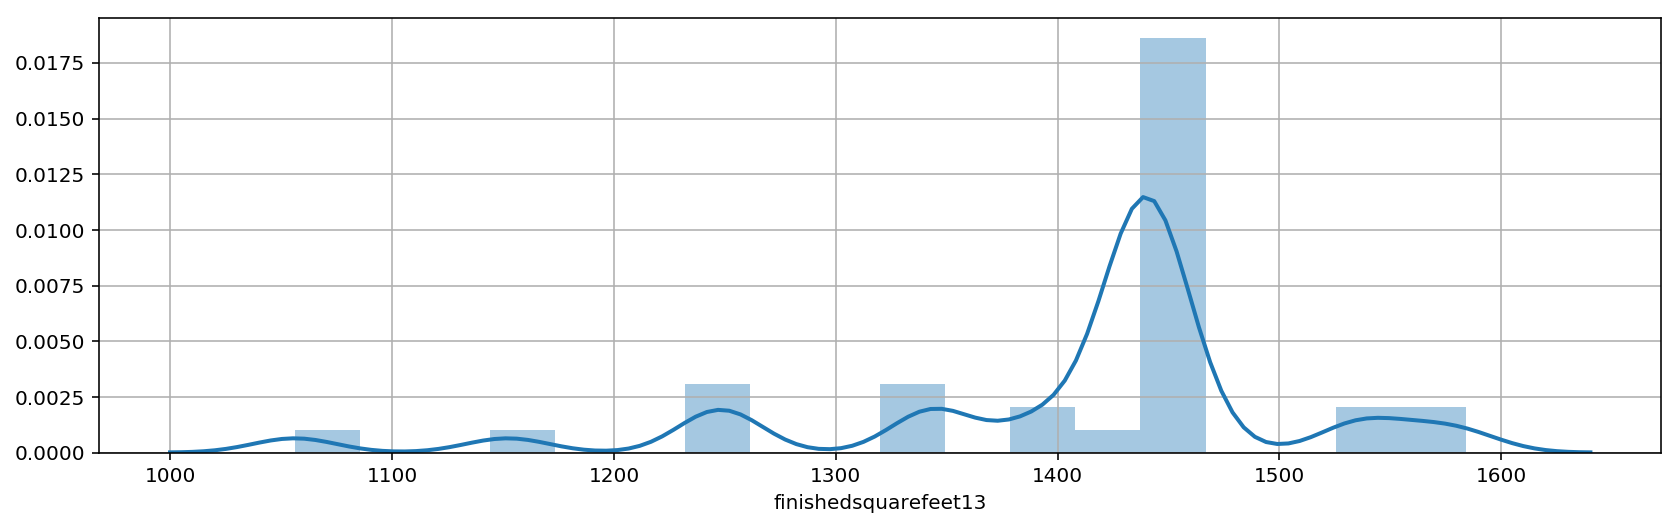

In [95]:
sns.distplot(df['finishedsquarefeet13'].dropna())
plt.plot()

In [96]:
df['finishedsquarefeet13'].fillna(df['finishedsquarefeet13'].mean(), inplace=True)

In [97]:
numerical.append('finishedsquarefeet13')

# finishedsquarefeet6

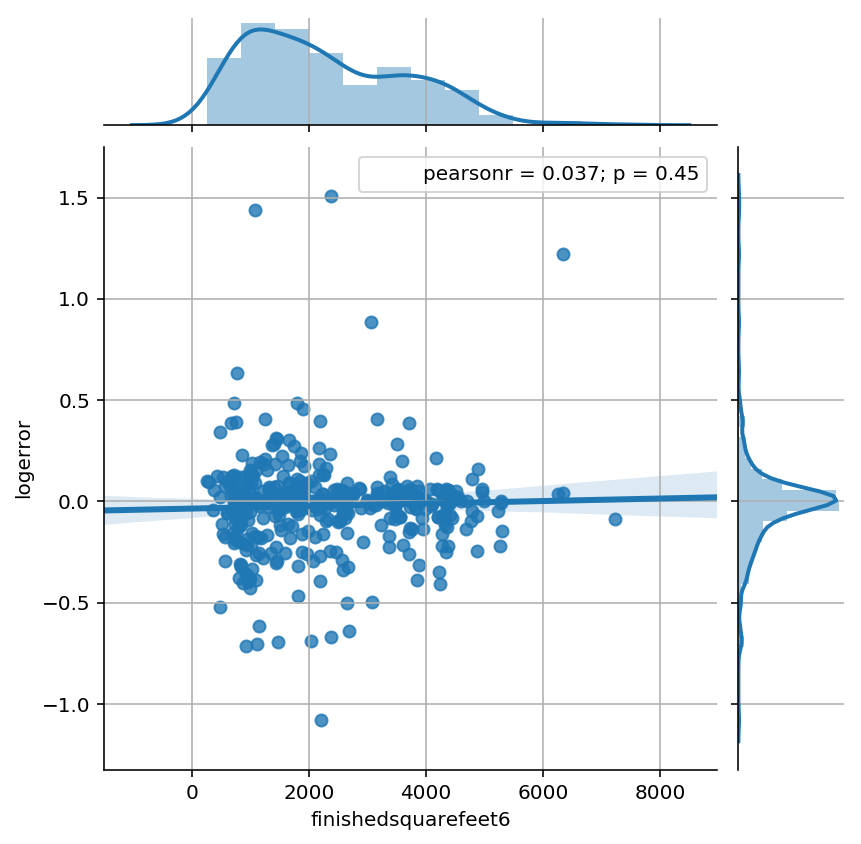

In [98]:
sns.jointplot(x=df['finishedsquarefeet6'], y=df['logerror'], kind='reg')
plt.show()

[]

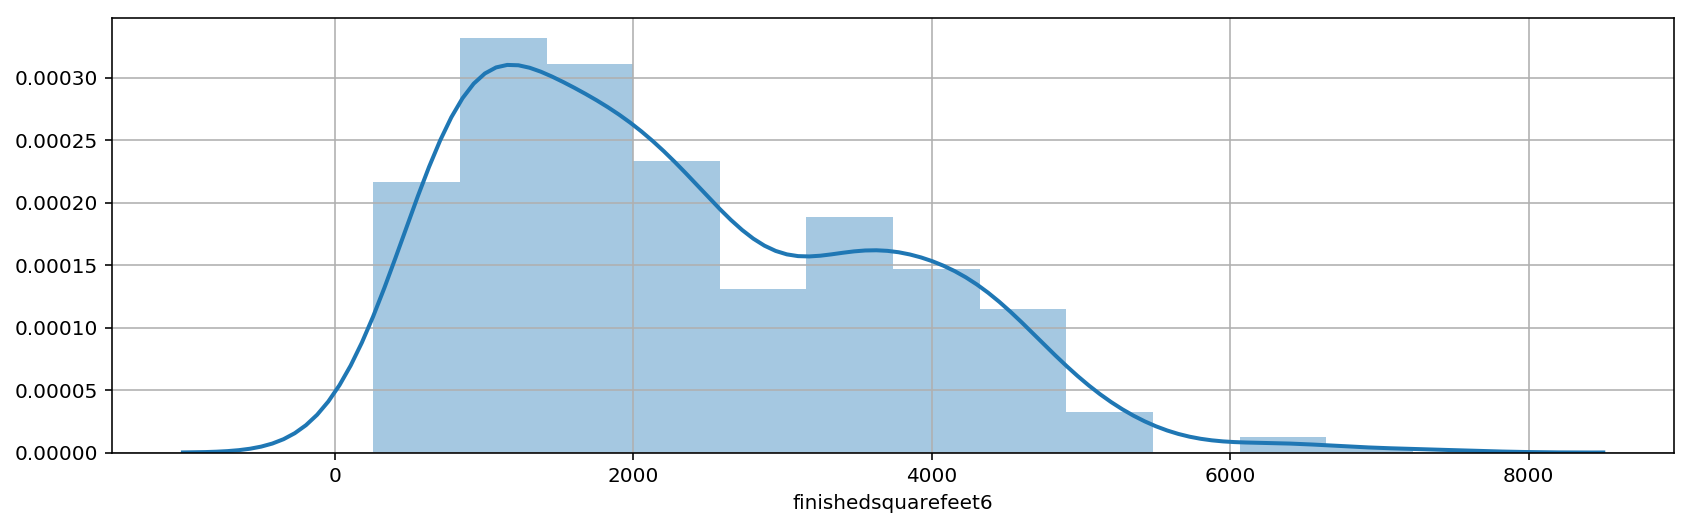

In [99]:
sns.distplot(df['finishedsquarefeet6'].dropna())
plt.plot()

In [100]:
df['finishedsquarefeet6'].fillna(df['finishedsquarefeet6'].mean(), inplace=True)

In [101]:
numerical.append('finishedsquarefeet6')

# yearbuilt

In [102]:
unique('yearbuilt')

0.008374411520354473%
[1959. 2014. 1940. 1987. 1981. 1982. 1939. 1994. 1984. 1977. 1954. 1995.
 1944. 2005. 1955. 1964. 1979. 1970. 1957. 1950. 1927. 1976. 1962. 1952.
 1998. 1986. 1973. 1966. 1983. 1961. 1953. 1948. 1946. 1965. 1972. 1956.
 1912. 1980. 1947. 1988. 1968. 1989. 1923. 1974. 1963. 1960. 2015. 2010.
 1951. 1978. 1975. 1999. 1928. 2003. 1990. 1993. 1985. 1913. 1925. 1929.
 2013. 1949. 1926. 1938.   nan 1941. 1922. 1943. 1958. 1930. 1991. 1992.
 1901. 1969. 2009. 2011. 1967. 2008. 1924. 1907. 2002. 2006. 2004. 1935.
 1936. 1971. 1996. 1904. 2000. 1997. 1937. 2001. 1900. 1918. 2007. 1908.
 1906. 1931. 1914. 1945. 1920. 1921. 1933. 1916. 1902. 1934. 1909. 1932.
 1910. 1942. 2012. 1903. 1915. 1919. 1890. 1896. 1911. 1895. 1917. 1905.
 1898. 1891. 1888. 1885. 1894. 1892. 1897. 1899. 1887. 1893. 1886.]
     yearbuilt  Counts
0       1885.0       6
1       1886.0       1
2       1887.0       1
3       1888.0       2
4       1890.0      18
5       1891.0       1
6       1892.0     

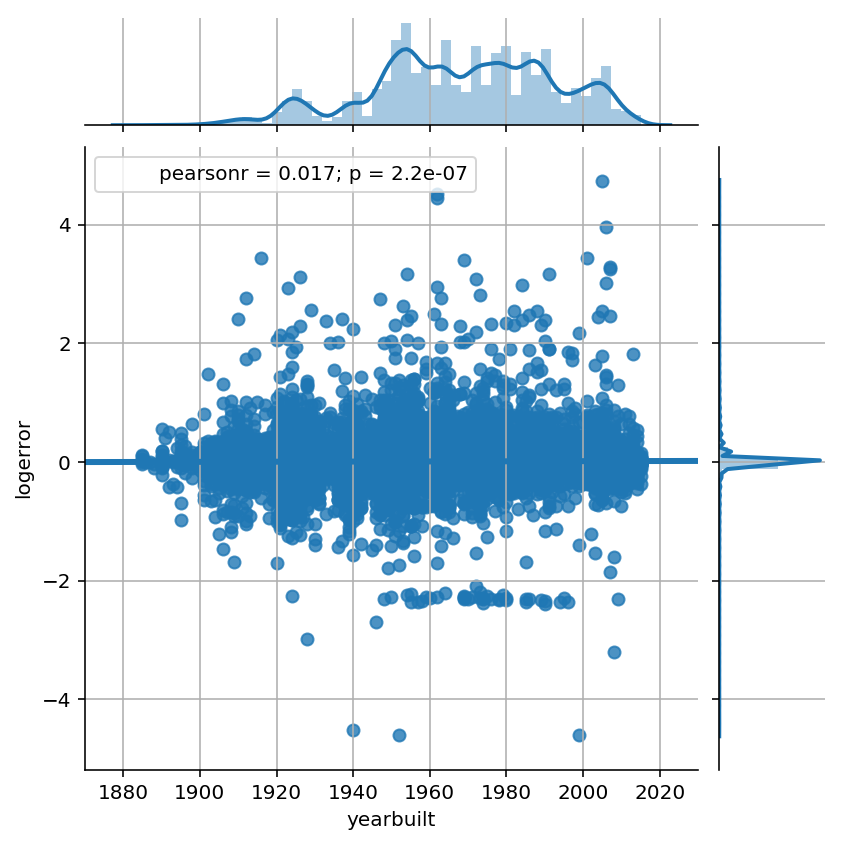

In [103]:
sns.jointplot(x=df['yearbuilt'], y=df['logerror'], kind='reg')
plt.show()

In [104]:
df['yearbuilt'].fillna(df['yearbuilt'].mode()[0], inplace=True)

In [105]:
numerical.append('yearbuilt')

# regionidcity

In [106]:
unique('regionidcity')

0.01997230684021047%
[ 12447.  32380.  47019.  17686.  29712.  24174.  13150.  25459.  46098.
 396054.  52650.  17150.  25218.  53655.  46298.  34780.  47568.  24832.
   5465.  40227.  54311.  10389.  21412.   6395.  33252.  25458.  24384.
  20008.  33836.   8384.  24812.  53571.  51617.  45888.  45457.  15554.
  24245.  16764.  27110.  40081.  41673.  34278.  12773.  16389.  42150.
  54970.     nan  52842.  34543.  15237.  53636.  37688.  13693.   5534.
  54722.  50749.  51239.  27491. 118225.  27103.  13091.  33837.  50677.
  10608.  10723.  48424.  47762.   6021.   9840.  18874.  38032.  44833.
  24435.  12292.  10774.  37015. 396556.  45602.  33311.  33612.  44116.
  10241.  25974.  21778.  14634.  11626.  40009.  14542.  30187.  32923.
  26483.  26531.  14906.  14111.  26964.  18875.  30908.  13716.  39306.
 118914.  38980.  25621.  51861. 118878.  34636.   4406.  17882.  30399.
  46314.  29189.  12520.  19177.  54053.  37086.  54299. 396053.  52835.
  53027.  39308.  47547. 11604

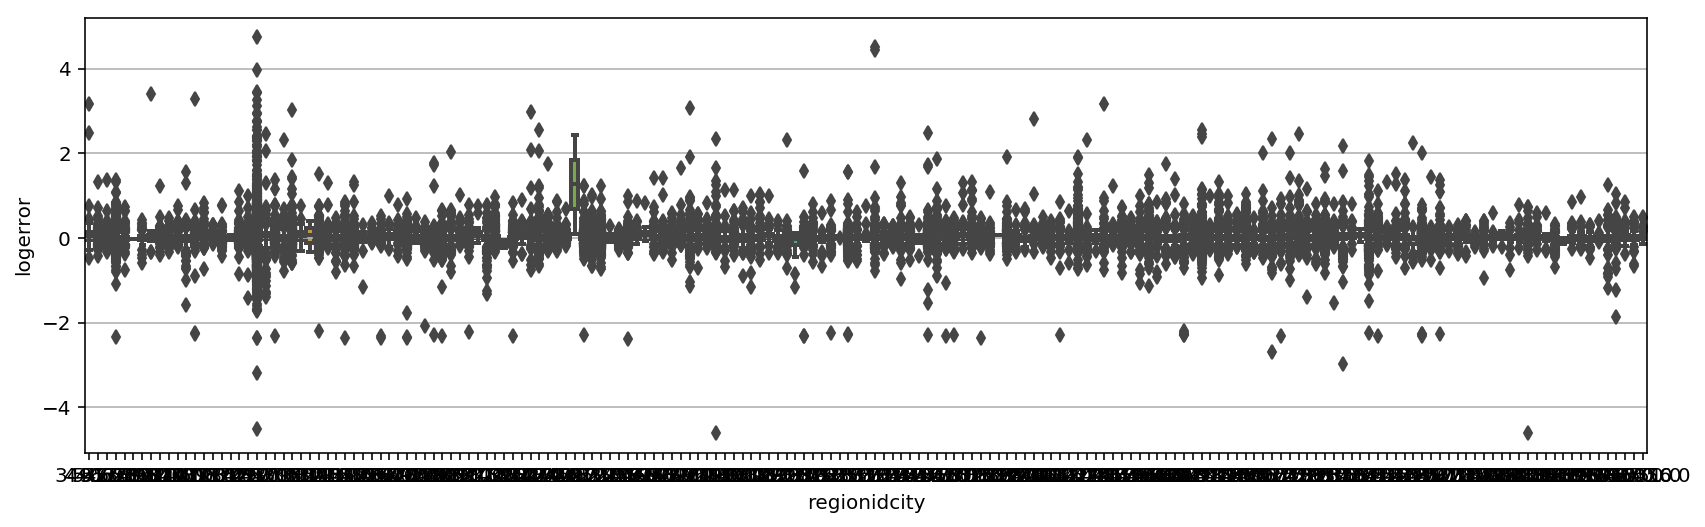

In [107]:
sns.boxplot(x=df['regionidcity'], y=df['logerror'])
plt.show()

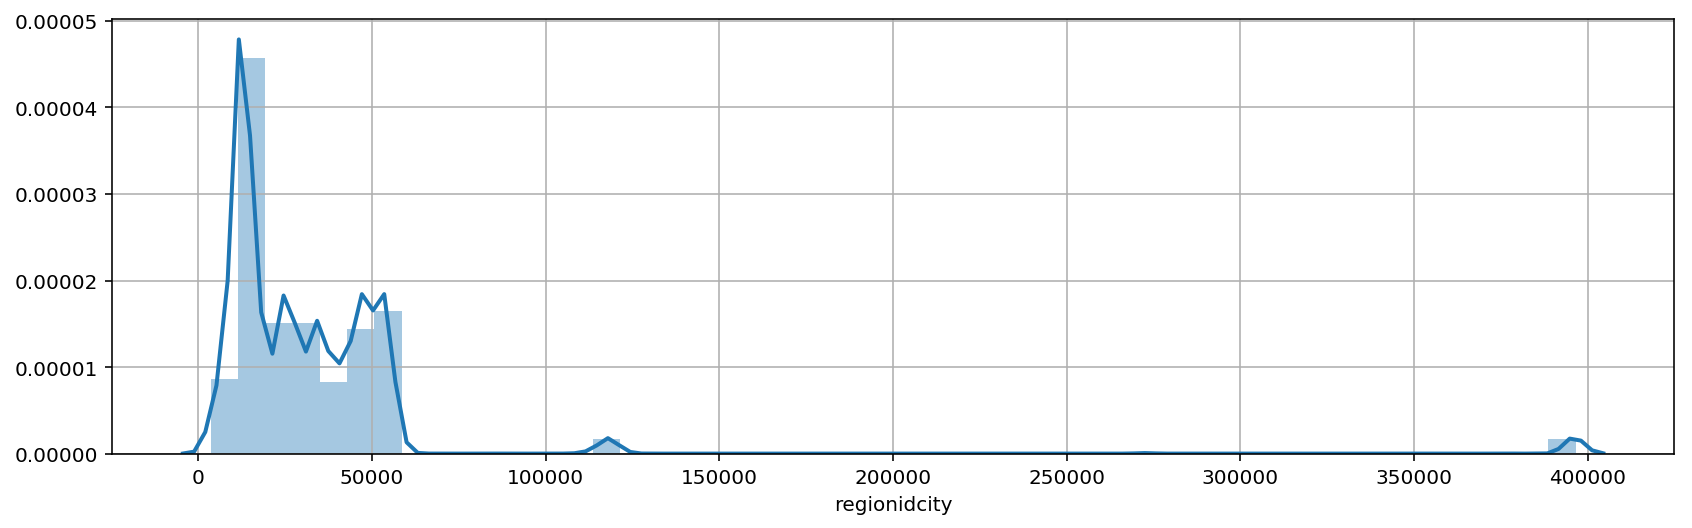

In [108]:
sns.distplot(df['regionidcity'].dropna())
plt.show()

In [109]:
df['regionidcity'].fillna(df['regionidcity'].mode()[0], inplace=True)\

In [110]:
categorical.append('regionidcity')

# lotsizesquarefeet

In [111]:
unique('lotsizesquarefeet')

0.11243422874549987%
[  7528.   3643.  11423. ...  35223.  50431. 156910.]
       lotsizesquarefeet  Counts
0                  167.0       1
1                  435.0      15
2                  438.0       1
3                  480.0       2
4                  486.0       1
5                  488.0       1
6                  540.0       4
7                  594.0       1
8                  630.0       2
9                  640.0       8
10                 646.0      11
11                 653.0       1
12                 700.0       1
13                 704.0       3
14                 715.0       2
15                 730.0       1
16                 739.0       1
17                 740.0       3
18                 745.0       1
19                 754.0       1
20                 759.0       1
21                 764.0       3
22                 769.0       2
23                 770.0       7
24                 771.0       1
25                 772.0       2
26                 776.0       2
2

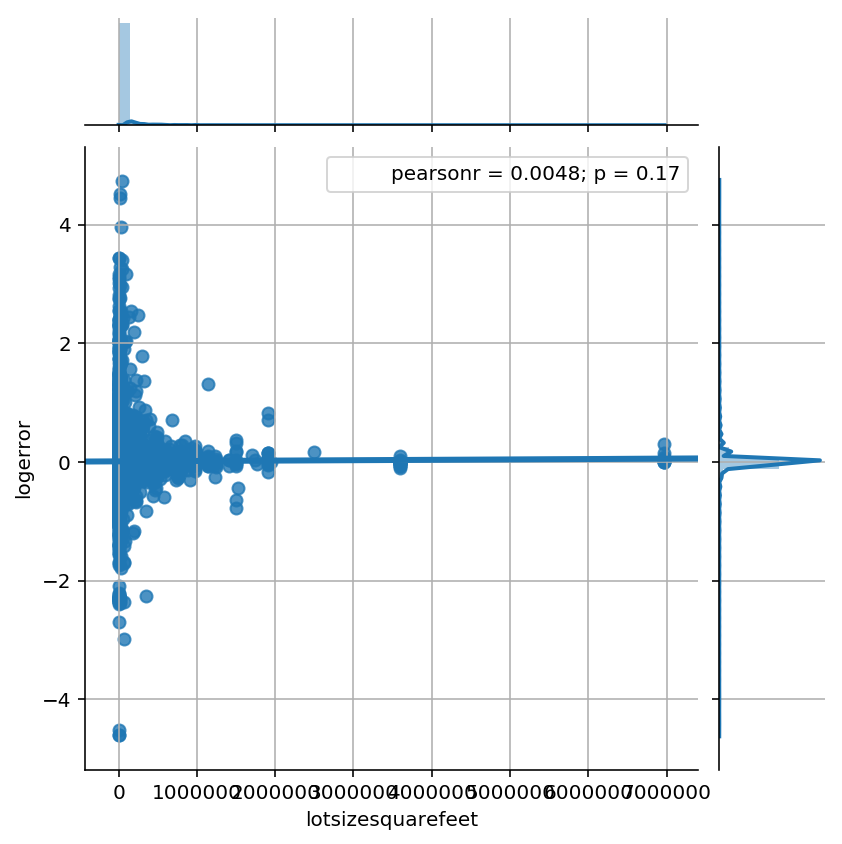

In [112]:
sns.jointplot(x=df['lotsizesquarefeet'], y=df['logerror'], kind='reg')
plt.show()

In [113]:
df['lotsizesquarefeet'].fillna(df['lotsizesquarefeet'].mean(), inplace=True)

In [114]:
numerical.append('lotsizesquarefeet')

# unitcnt

In [115]:
unique('unitcnt')

0.353608418720576%
[  1.  nan   2.   4.   3.   6. 143.  11.   9.   5.  70.]
   unitcnt  Counts
0      1.0   54503
1      2.0    2354
2      3.0     619
3      4.0     871
4      5.0       1
5      6.0       1
6      9.0       1
7     11.0       1
8     70.0       1
9    143.0       1


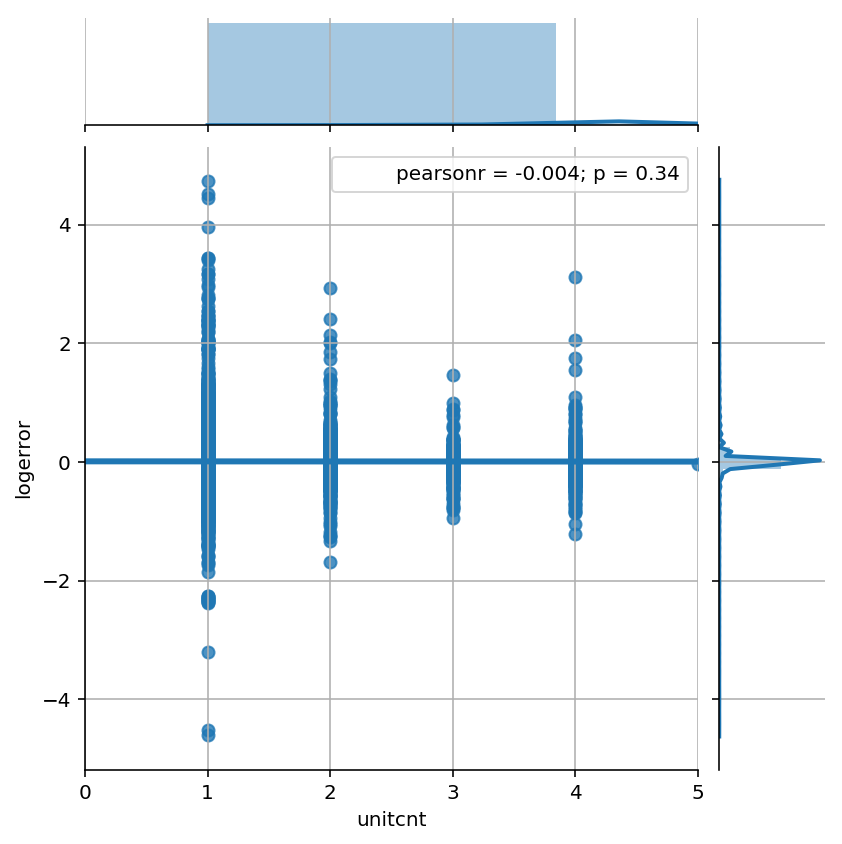

In [116]:
sns.jointplot(x=df['unitcnt'], y=df['logerror'], kind='reg')
plt.xlim(0,5)
plt.show()

In [117]:
df['unitcnt'].fillna(0, inplace=True)

In [118]:
categorical.append('unitcnt')

# propertyzoningdesc

In [119]:
unique('propertyzoningdesc')

0.3540515092772085%
['LARS' nan 'PSR6' ... 'SHCG' 'COR2YY' 'LNR2RPD-R3']
     propertyzoningdesc  Counts
0                 1NR1*       4
1                 1NR3*       3
2             AH RM-CD*       8
3            AH RM-CD-F       4
4            AH RS(3)10       1
5            AH RS-(3)-       2
6                AHA11*       5
7            AHA110000*       1
8                AHA21*       1
9            AHR110000*       6
10           AHR120000*       2
11            AHR17000*      47
12           AHR17000-C       3
13            AHR17500*      10
14            AHR26250*      10
15                AHR3*      13
16           AHR3-R325U       3
17             AHR335U*      10
18           AHRA10000*       2
19           AHRA20000*      10
20           AHRA20000-       1
21           AHRA2OOOO*       1
22           AHRH-OA-FC       2
23             AHRPD10*       6
24           AHRPD10000      44
25           AHRPD11.6U       3
26           AHRPD15000       6
27             AHRPD1O*       3

In [120]:
df['propertyzoningdesc'].fillna(df['propertyzoningdesc'].mode()[0], inplace=True)

In [121]:
categorical.append('propertyzoningdesc')

# buildingqualitytypeid

In [122]:
unique('buildingqualitytypeid')

0.3645638327333149%
[ 4. nan  1.  7. 12. 10.  8.  6. 11.]
   buildingqualitytypeid  Counts
0                    1.0    2627
1                    4.0   23839
2                    6.0       2
3                    7.0   29310
4                    8.0       5
5                   10.0    1461
6                   11.0       1
7                   12.0     119


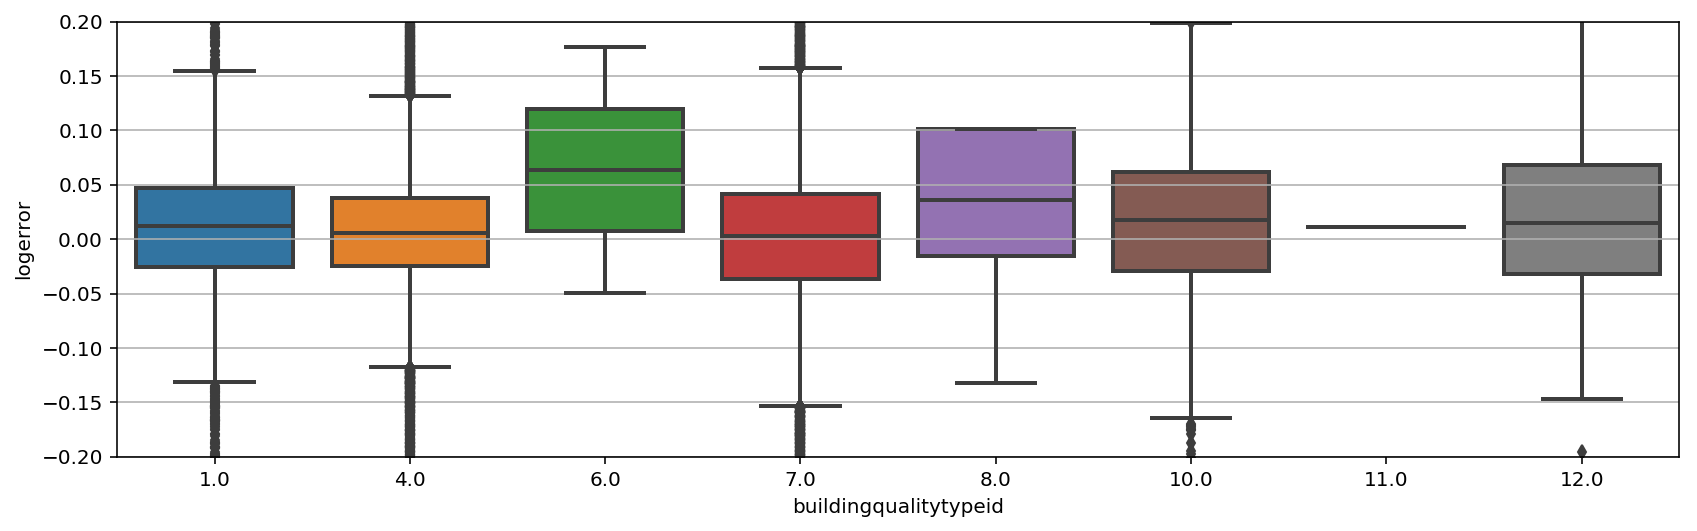

In [123]:
sns.boxplot(x=df['buildingqualitytypeid'], y=df['logerror'])
plt.ylim(-0.2, 0.2)
plt.show()

In [124]:
df['buildingqualitytypeid'].fillna(0, inplace=True)

In [125]:
categorical.append('buildingqualitytypeid')

# heatingorsystemtypeid

In [126]:
unique('heatingorsystemtypeid')

0.3787870396012185%
[ 2. nan  7.  6. 24. 13. 20. 18. 11.  1. 14. 12. 10.]
    heatingorsystemtypeid  Counts
0                     1.0      13
1                     2.0   38303
2                     6.0     970
3                     7.0   15519
4                    10.0       2
5                    11.0       1
6                    12.0       1
7                    13.0      76
8                    14.0       2
9                    18.0      25
10                   20.0      97
11                   24.0    1071


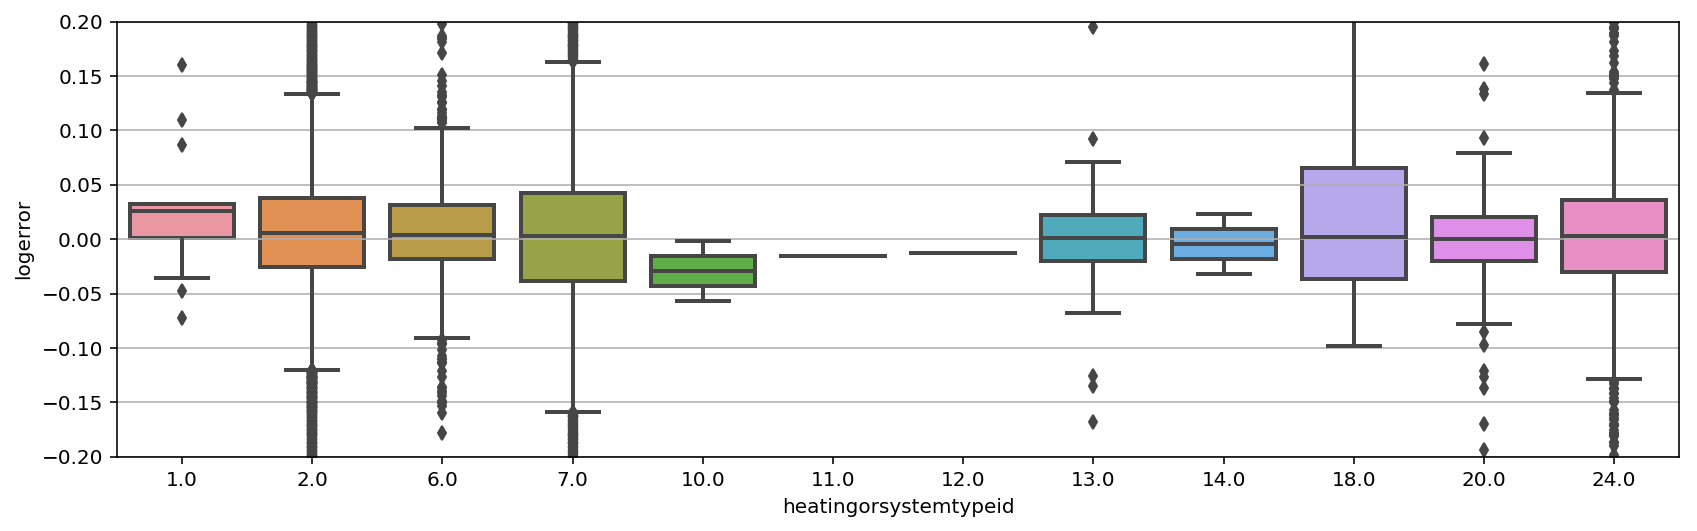

In [127]:
sns.boxplot(x=df['heatingorsystemtypeid'], y=df['logerror'])
plt.ylim(-0.2,0.2)
plt.show()

In [128]:
df['heatingorsystemtypeid'].fillna(0, inplace=True)

In [129]:
categorical.append('heatingorsystemtypeid')

# regionidneighborhood

In [130]:
unique('regionidneighborhood')

0.6010855718637497%
[ 31817.     nan 275411.  54300.  51906.  19810. 273096. 274961.  47950.
 276476.   7877. 273567.  37739. 416320. 274359.  40215.  40548. 268509.
 275738. 275426. 118208.  48570. 114914. 762187. 275396. 113455. 268134.
 403197.  47880.  13327. 273252. 274800. 276606. 268473. 276450.  46736.
 274828.  28119.  27080. 113749. 116302. 274895.  13017. 276157. 268496.
  27328.  27484. 403142. 275470. 275695. 274750. 268548. 118849. 118872.
 417224. 273197. 268249.  46795. 403196. 268002. 116375.  21056. 113910.
 276119.  48200. 113688. 274049. 115609. 275496. 114246.  32368. 275994.
   6952. 113886. 403192. 116774. 275405. 268097.  41466. 118825.  37835.
 275884. 272968. 273539. 416304.  34213.  41131. 275958. 268588.  32059.
 117954. 274684. 274513. 274514. 275111. 762685. 403184.  33183. 276256.
 275824. 259606. 274371. 275856. 273837. 274293. 276514. 273825. 275989.
 276486. 416330. 273198.  13176. 274815. 275785. 275428. 274582. 764164.
 762179. 416329. 118920. 268482

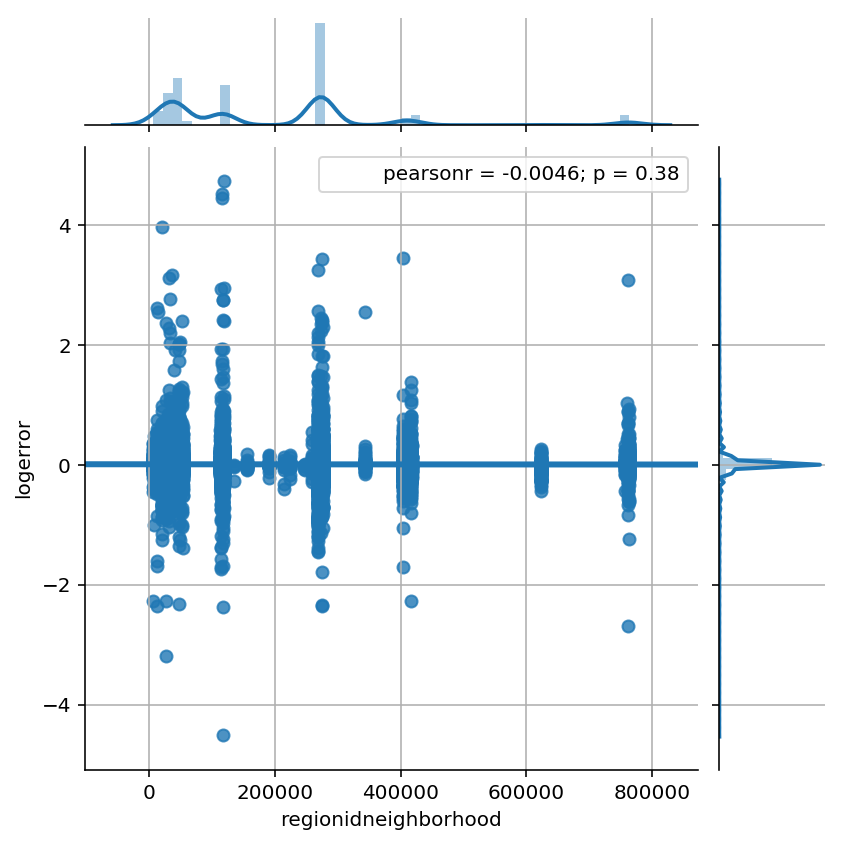

In [131]:
sns.jointplot(x=df['regionidneighborhood'], y=df['logerror'], kind='reg')
plt.show()

In [132]:
df['regionidneighborhood'].fillna(df['regionidneighborhood'].mean(), inplace=True)

In [133]:
numerical.append('regionidneighborhood')

# airconditioningtypeid

In [134]:
unique('airconditioningtypeid')

0.681185267238992%
[ 1. nan  5. 13. 11.  9.  3.]
   airconditioningtypeid  Counts
0                    1.0   26668
1                    3.0       1
2                    5.0     215
3                    9.0       1
4                   11.0      63
5                   13.0    1833


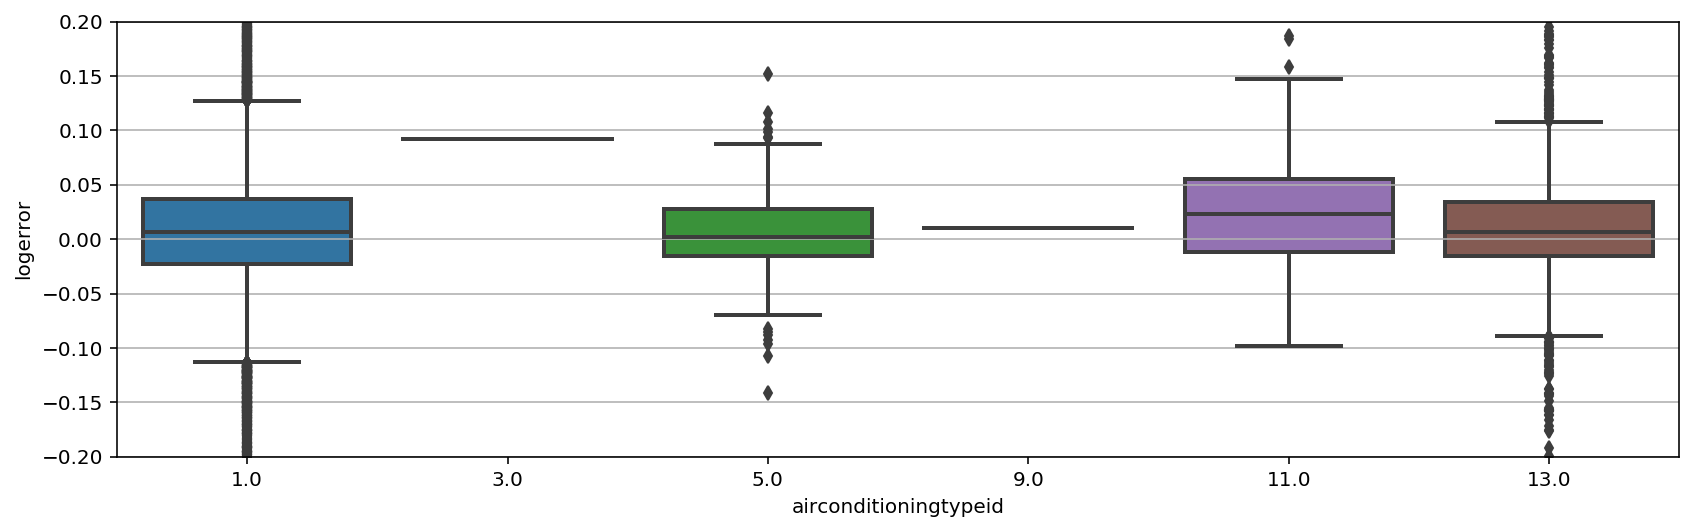

In [135]:
sns.boxplot(x=df['airconditioningtypeid'], y=df['logerror'])
plt.ylim(-0.2,0.2)
plt.show()

In [136]:
df['airconditioningtypeid'].fillna(0, inplace=True)

In [137]:
categorical.append('airconditioningtypeid')

# numberofstories

In [138]:
unique('numberofstories')

0.7721406812517309%
[nan  2.  1.  3.  4.]
   numberofstories  Counts
0              1.0   12016
1              2.0    8044
2              3.0     508
3              4.0       2


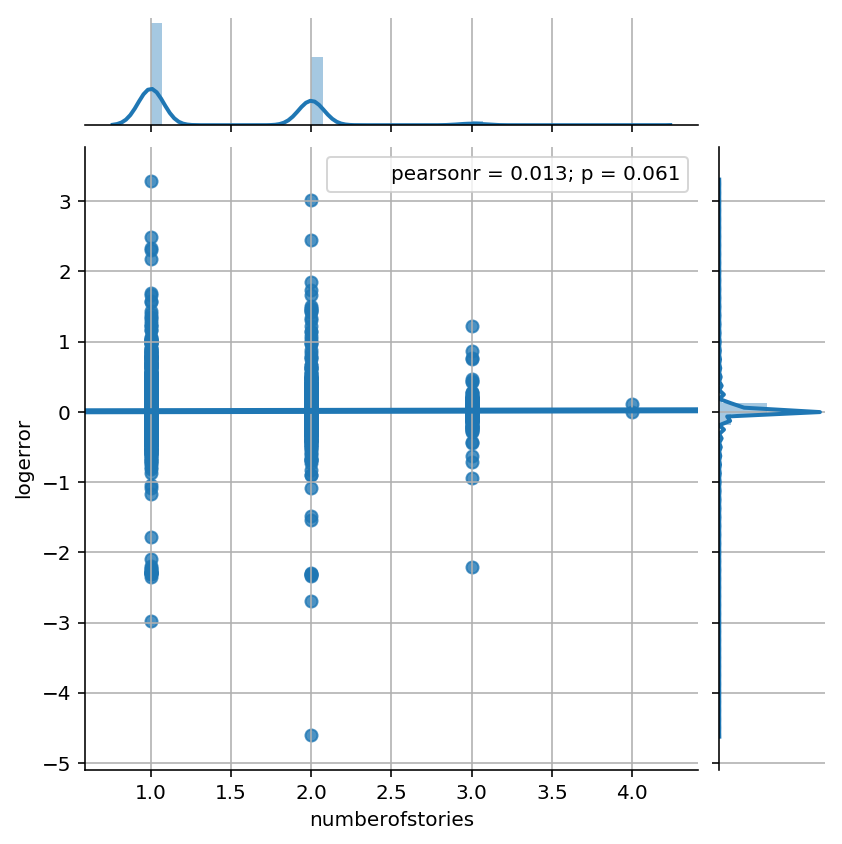

In [139]:
sns.jointplot(x=df['numberofstories'], y=df['logerror'], kind='reg')
plt.show()

In [140]:
df['numberofstories'].fillna(0, inplace=True)

In [141]:
categorical.append('numberofstories')

# fireplacecnt

In [142]:
unique('fireplacecnt')

0.8935807255607865%
[nan  1.  2.  3.  4.  5.]
   fireplacecnt  Counts
0           1.0    8165
1           2.0    1106
2           3.0     312
3           4.0      21
4           5.0       3


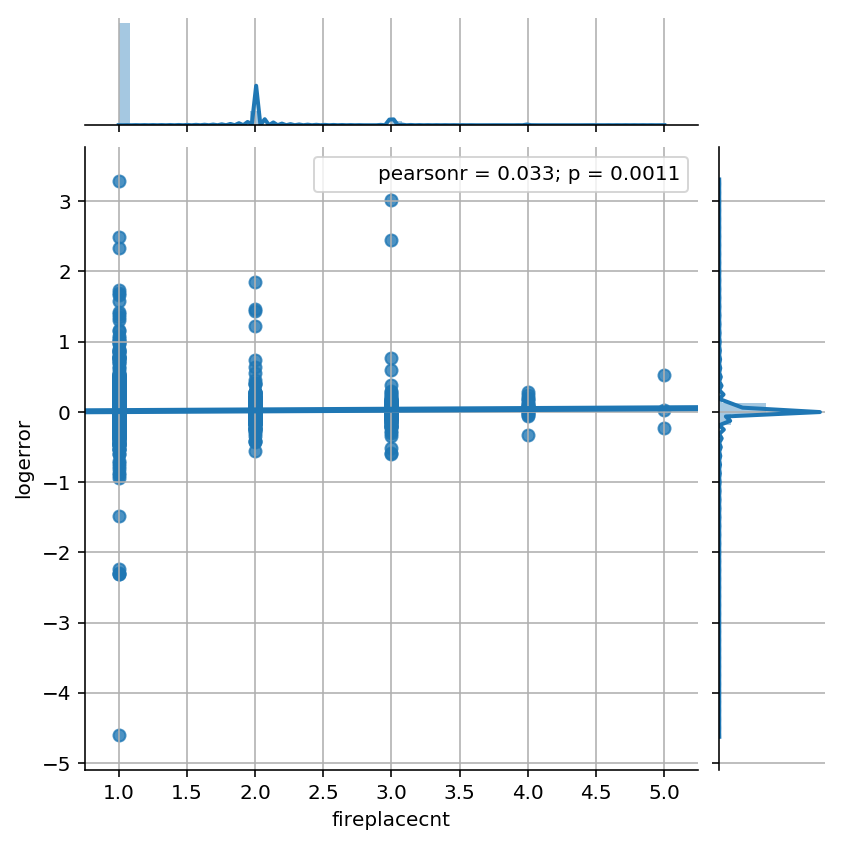

In [143]:
sns.jointplot(x=df['fireplacecnt'], y=df['logerror'], kind='reg')
plt.show()

In [144]:
df['fireplacecnt'].fillna(0, inplace=True)

In [145]:
categorical.append('fireplacecnt')

# yardbuildingsqft17

In [146]:
unique('yardbuildingsqft17')

0.9706895596787594%
[  nan   54.  364.  144.   77.  384.  520.  247.  628.  984.  424.  220.
  180.   80.  200.  389.   50.  276.  157.  236.  300.  396.  450.  973.
  216.  150.   84.  110.  420.   98.  160.  210.  175.  242.  312.  372.
  208.  440.  270.  400.  351.  307.  900.  720.  129.  260.  361.  325.
  329.  120.  100.  624.  456.  126.  382.  598.   97.  136.  395.  188.
 1700.  432.  273.  358.  843.  253.  190.  104.  438.  170.  109.  263.
  192.  342.   72.  310.  204.  668.  262.  226.  529.  135.  324.  427.
  119.  360.  474.  240.  219. 1262.  535.  553.  472.  492.  166.  330.
  620.  235.  254.  495.  256.  308.   70.  753.  224.  514.  292.  350.
  128.  317.  184.  352.  164.  336.  340.  280.  154.  714.  105.  390.
  373.   63.  588.  480.  297.   78.  228.   36.  366.  503.  460.  405.
  196.   45.  140.   64.  388.  112.  168.  602.  392.  314.  448.  225.
  322.  106.  289.  408.  819.  794.  533.  201.  288.  442.  290.  600.
  504.  252.   90.  800. 1272. 

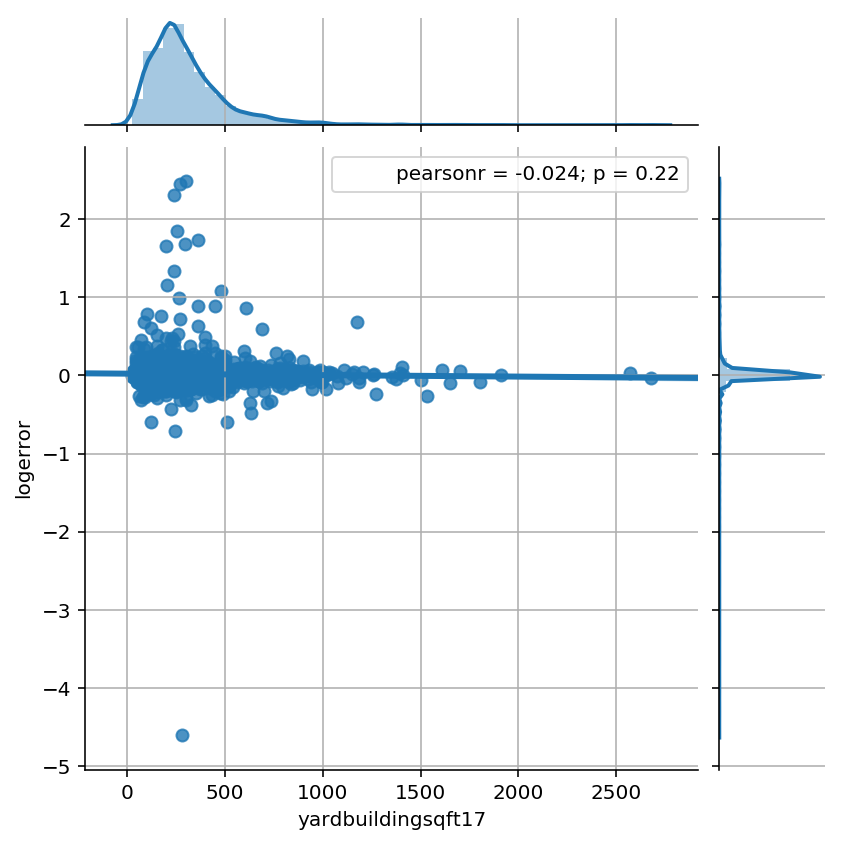

In [147]:
sns.jointplot(x=df['yardbuildingsqft17'], y=df['logerror'], kind='reg')
plt.show()

In [148]:
df['yardbuildingsqft17'].fillna(df['yardbuildingsqft17'].mean(), inplace=True)

In [149]:
numerical.append('yardbuildingsqft17')

# hashottuborspa

In [150]:
unique('hashottuborspa')

0.9738022708391028%
[nan True]
   hashottuborspa  Counts
0            True    2365


In [151]:
df['hashottuborspa'].fillna(0, inplace=True)

In [152]:
categorical.append('hashottuborspa')

# decktypeid

In [153]:
unique('decktypeid')

0.9927111603433951%
[nan 66.]
   decktypeid  Counts
0        66.0     658


In [154]:
df['decktypeid'].fillna(0, inplace=True)

In [155]:
categorical.append('decktypeid')

# typeconstructiontypeid

In [156]:
unique('typeconstructiontypeid')

0.996687898089172%
[nan  6. 13.  4.]
   typeconstructiontypeid  Counts
0                     4.0       2
1                     6.0     296
2                    13.0       1


In [157]:
df['typeconstructiontypeid'].fillna(0, inplace=True)

In [158]:
categorical.append('typeconstructiontypeid')

# architecturalstyletypeid

In [159]:
unique('architecturalstyletypeid')

0.9971088341179729%
[nan  7.  8.  2. 10.  3. 21.]
   architecturalstyletypeid  Counts
0                       2.0      11
1                       3.0       4
2                       7.0     221
3                       8.0      16
4                      10.0       1
5                      21.0       8


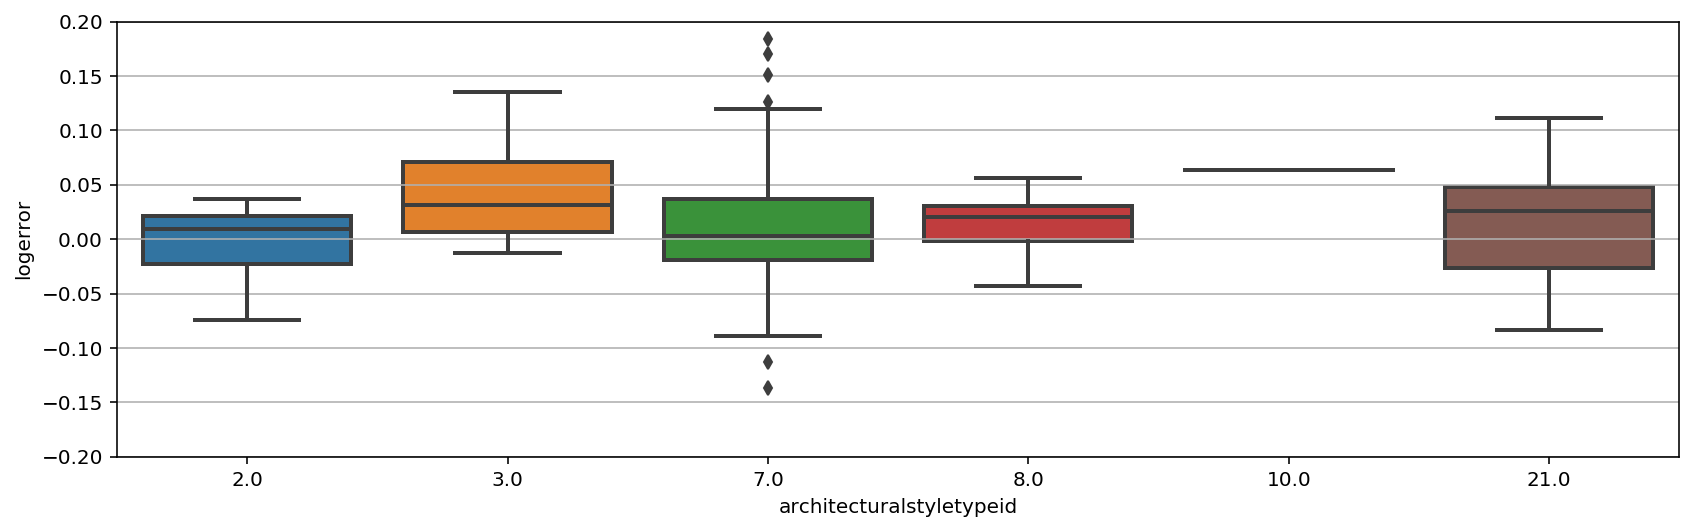

In [160]:
sns.boxplot(x=df['architecturalstyletypeid'], y=df['logerror'])
plt.ylim(-0.2,0.2)
plt.show()

In [161]:
df['architecturalstyletypeid'].fillna(0, inplace=True)

In [162]:
categorical.append('architecturalstyletypeid')

# fireplaceflag

In [163]:
unique('fireplaceflag')

0.9975408474106896%
[nan True]
   fireplaceflag  Counts
0           True     222


In [164]:
df['fireplaceflag'].fillna(0, inplace=True)

In [165]:
categorical.append('fireplaceflag')

# yardbuildingsqft26

In [166]:
unique('yardbuildingsqft26')

0.9989476599279978%
[  nan 1200.  126.  322.  120.  235.  125. 1197.  204.  156.   62.   18.
   55.  168.   56.   54.  100.   36.  110.  144.  264.  180.  119.  252.
  477.  150.  268.  230.  231.  308.   60.   34.  136.  864.  846.   88.
  159. 1366.   37.   78.  642.  627.  960. 1000. 1182.  400.  276.  290.
  943.  192.  480.  288.  108.   49.  525.  408.  133.   96.   72.  504.
  310.  160.   41.  104.   33.   90.   48. 1050.  200. 1100.  240. 1248.
  648.  550.]
    yardbuildingsqft26  Counts
0                 18.0       1
1                 33.0       1
2                 34.0       1
3                 36.0       1
4                 37.0       2
5                 41.0       1
6                 48.0       1
7                 49.0       1
8                 54.0       1
9                 55.0       1
10                56.0       2
11                60.0       3
12                62.0       1
13                72.0       1
14                78.0       1
15                88.0       2
1

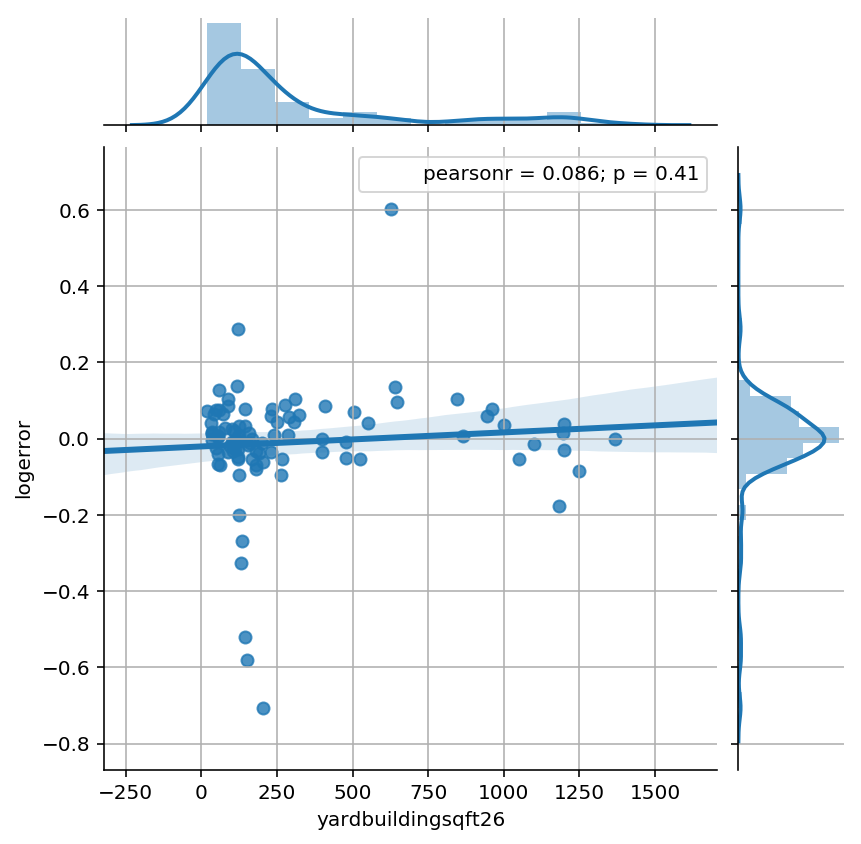

In [167]:
sns.jointplot(x=df['yardbuildingsqft26'], y=df['logerror'], kind='reg')
plt.show()

In [168]:
df['yardbuildingsqft26'].fillna(df['yardbuildingsqft26'].mean(), inplace=True)

In [169]:
numerical.append('yardbuildingsqft26')

# basementsqft

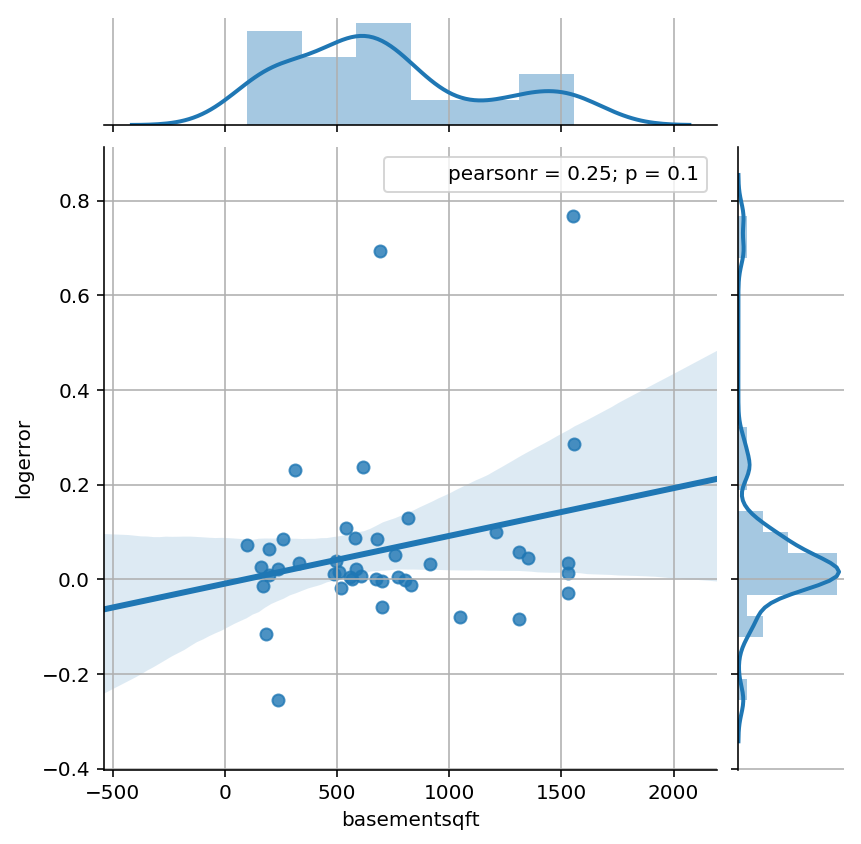

In [170]:
sns.jointplot(x=df['basementsqft'], y=df['logerror'], kind='reg')
plt.show()

In [171]:
df['basementsqft'].fillna(df['basementsqft'].mean(), inplace=True)

In [172]:
numerical.append('basementsqft')

# storytypeid

In [173]:
unique('storytypeid')

0.9995236776516201%
[nan  7.]
   storytypeid  Counts
0          7.0      43


In [174]:
df['storytypeid'].fillna(0, inplace=True)

In [175]:
categorical.append('storytypeid')

# buildingclasstypeid

In [176]:
unique('buildingclasstypeid')

0.999822763777347%
[nan  4.]
   buildingclasstypeid  Counts
0                  4.0      16


In [177]:
df['buildingqualitytypeid'].fillna(0, inplace=True)

In [178]:
categorical.append('buildingqualitytypeid')

In [179]:
numerical, len(numerical)

(['taxamount',
  'landtaxvaluedollarcnt',
  'structuretaxvaluedollarcnt',
  'bathroomcnt',
  'poolsizesum',
  'garagetotalsqft',
  'finishedfloor1squarefeet',
  'finishedsquarefeet50',
  'finishedsquarefeet13',
  'finishedsquarefeet6',
  'yearbuilt',
  'lotsizesquarefeet',
  'regionidneighborhood',
  'yardbuildingsqft17',
  'yardbuildingsqft26',
  'basementsqft'],
 16)

In [180]:
categorical, len(categorical)

(['taxdelinquencyyear',
  'taxdelinquencyflag',
  'propertycountylandusecode',
  'regionidzip',
  'fips',
  'poolcnt',
  'pooltypeid2',
  'pooltypeid10',
  'garagecarcnt',
  'regionidcity',
  'unitcnt',
  'propertyzoningdesc',
  'buildingqualitytypeid',
  'heatingorsystemtypeid',
  'airconditioningtypeid',
  'numberofstories',
  'fireplacecnt',
  'hashottuborspa',
  'decktypeid',
  'typeconstructiontypeid',
  'architecturalstyletypeid',
  'fireplaceflag',
  'storytypeid',
  'buildingqualitytypeid'],
 24)

# longitude, latitude

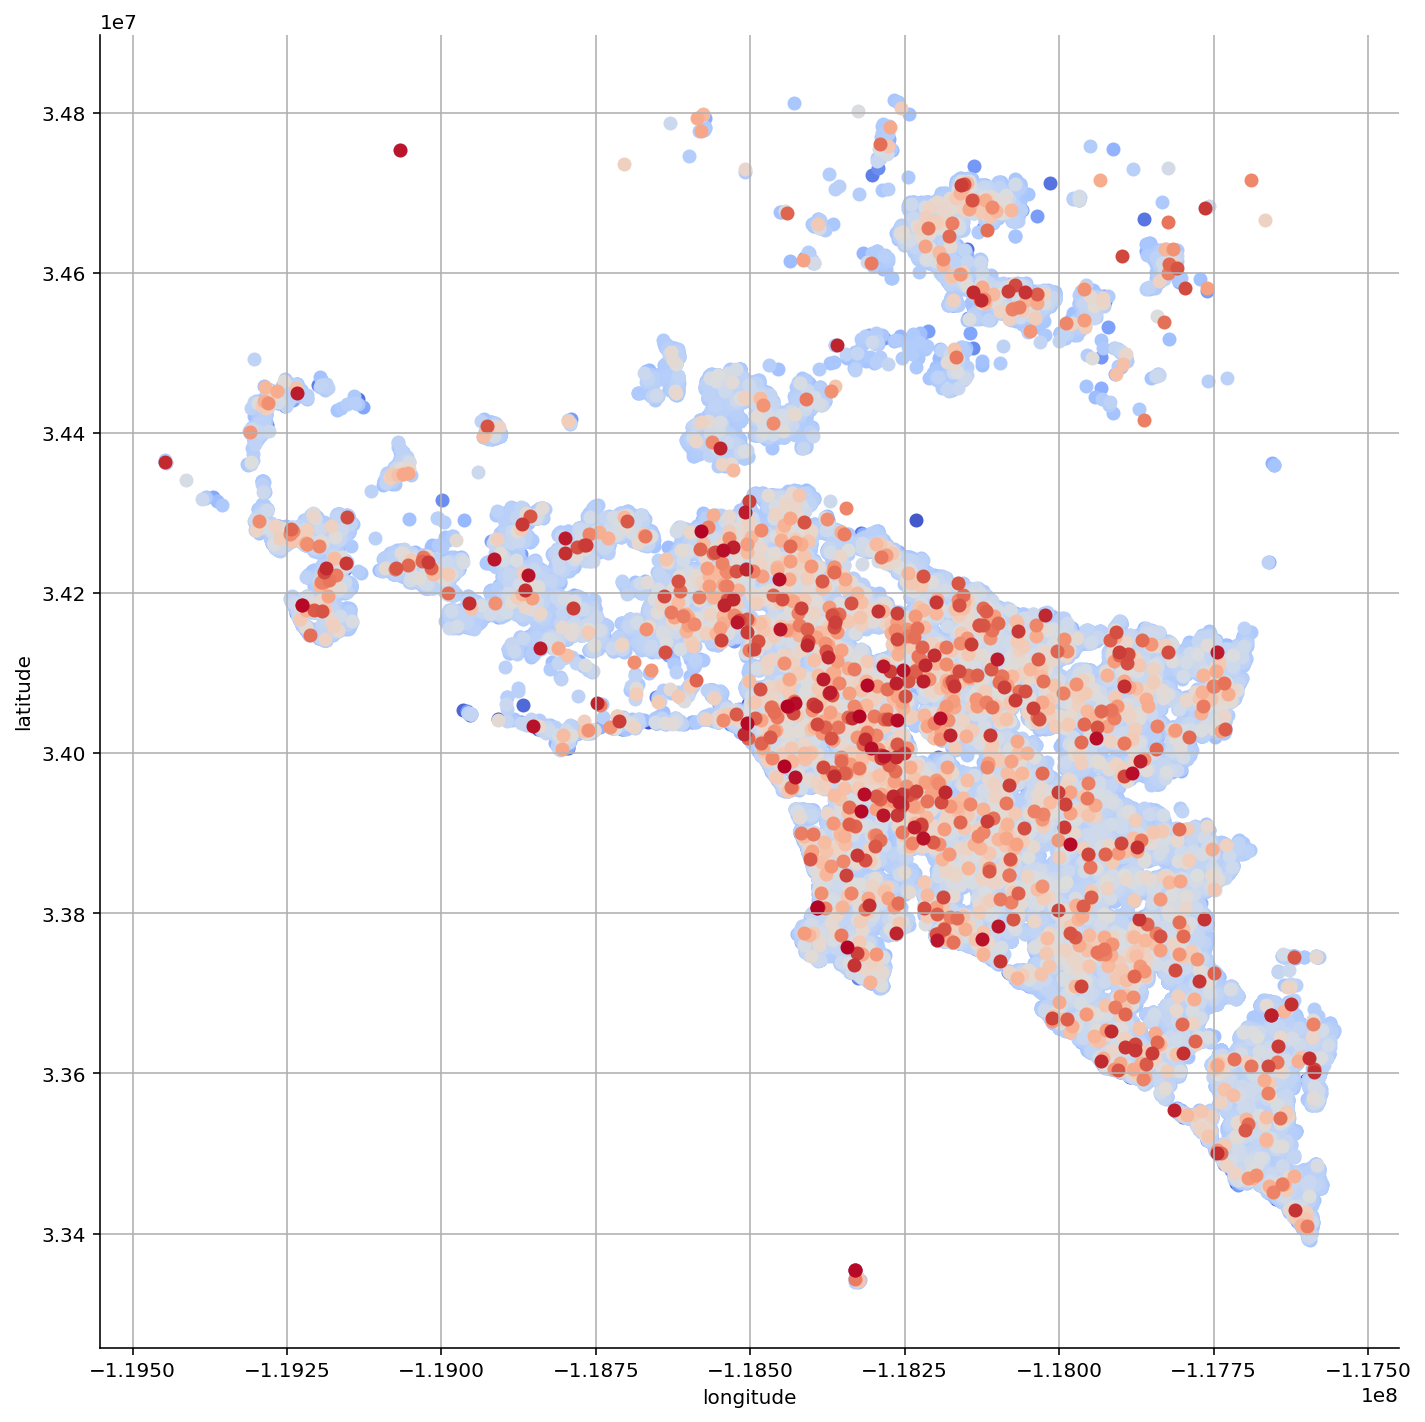

In [181]:
sns.FacetGrid(df, hue='logerror', palette="coolwarm", size=10).map(plt.scatter, 'longitude', 'latitude')
plt.show()

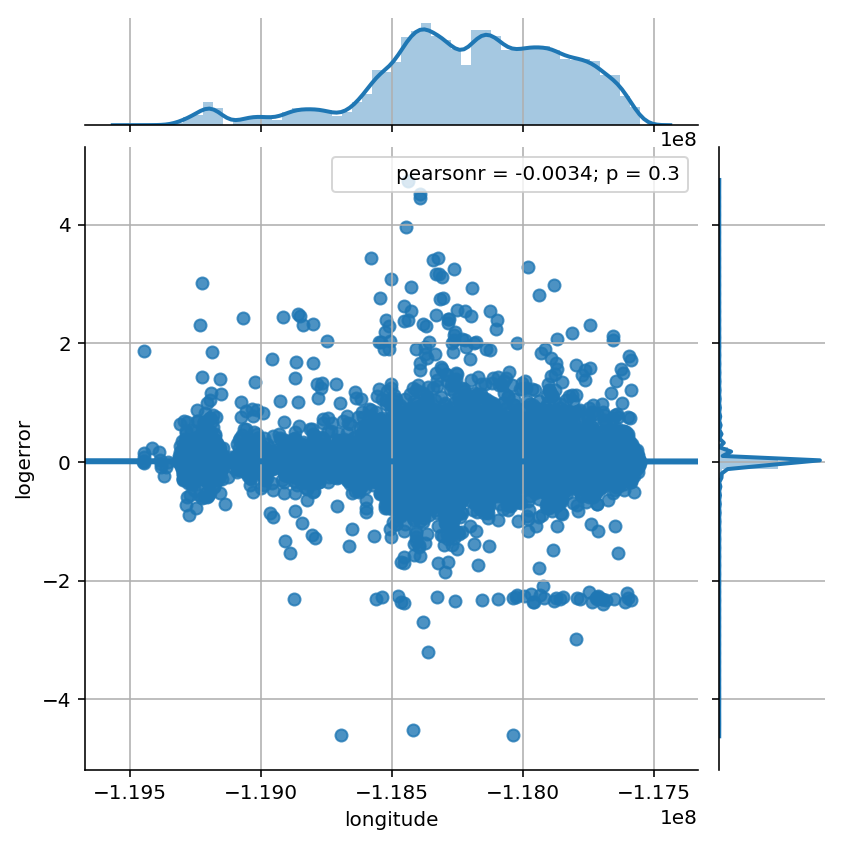

In [182]:
sns.jointplot(x=df['longitude'], y=df['logerror'], kind='reg')
plt.show()

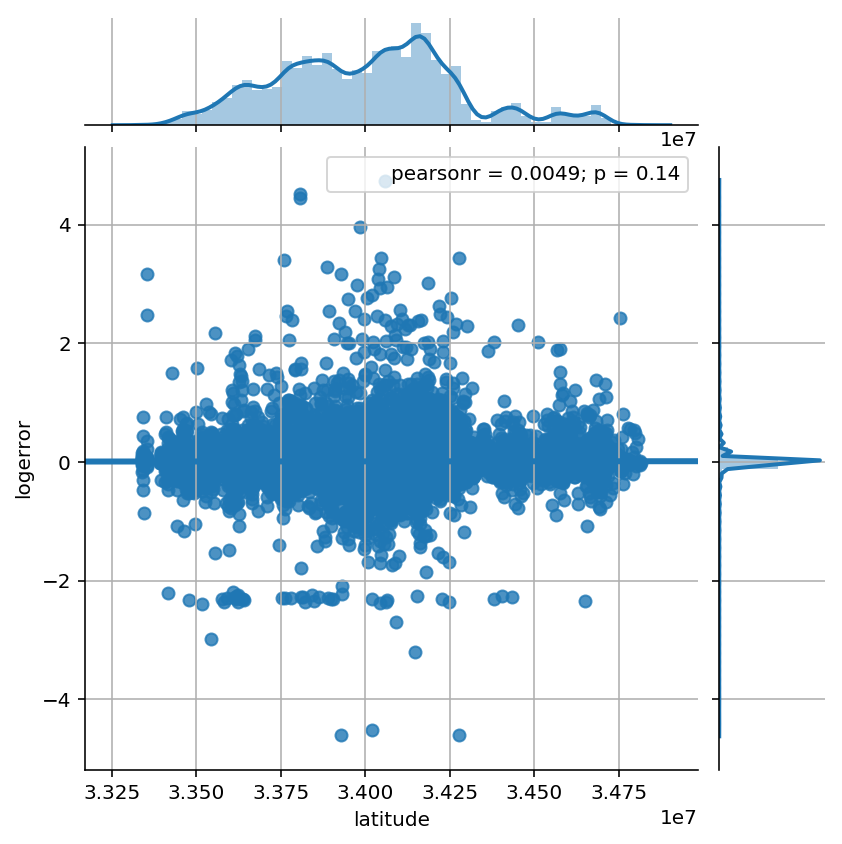

In [183]:
sns.jointplot(x=df['latitude'], y=df['logerror'], kind='reg')
plt.show()

In [184]:
numerical.append('longitude')
numerical.append('latitude')

# propertylandusetypeid

In [185]:
unique('propertylandusetypeid')

0.0%
[261. 266. 265. 246. 263. 269. 248. 247. 267. 275. 260.  31. 264.  47.]
    propertylandusetypeid  Counts
0                    31.0      17
1                    47.0       1
2                   246.0    2376
3                   247.0     629
4                   248.0     879
5                   260.0      62
6                   261.0   60637
7                   263.0      84
8                   264.0      11
9                   265.0     356
10                  266.0   22815
11                  267.0      28
12                  269.0    2334
13                  275.0      46


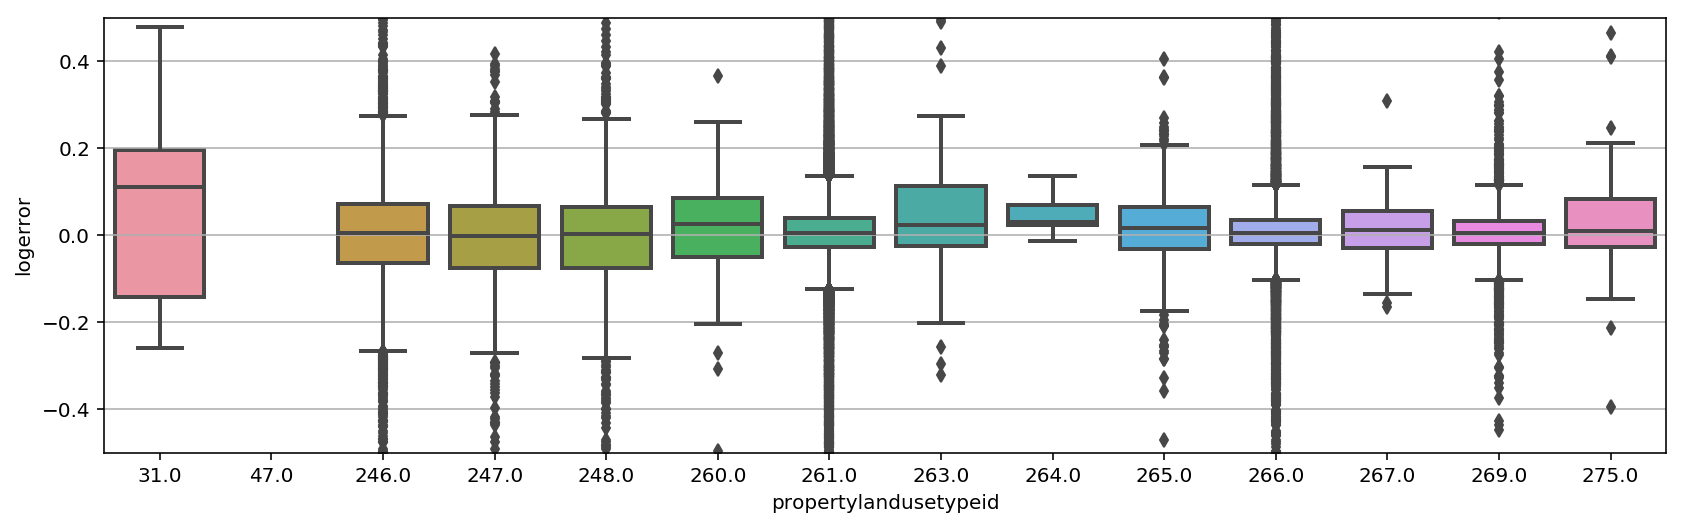

In [186]:
sns.boxplot(x=df['propertylandusetypeid'], y=df['logerror'])
plt.ylim(-0.5, 0.5)
plt.show()

In [187]:
categorical.append('propertylandusetypeid')

# roomcnt

In [188]:
unique('roomcnt')

0.0%
[ 0.  8.  6.  5.  7.  4.  3.  9. 12. 11. 10.  2.  1. 13. 15. 14. 18.]
    roomcnt  Counts
0       0.0   69700
1       1.0       3
2       2.0      10
3       3.0     271
4       4.0    1673
5       5.0    3486
6       6.0    5353
7       7.0    4487
8       8.0    3410
9       9.0    1356
10     10.0     364
11     11.0     111
12     12.0      33
13     13.0      11
14     14.0       4
15     15.0       2
16     18.0       1


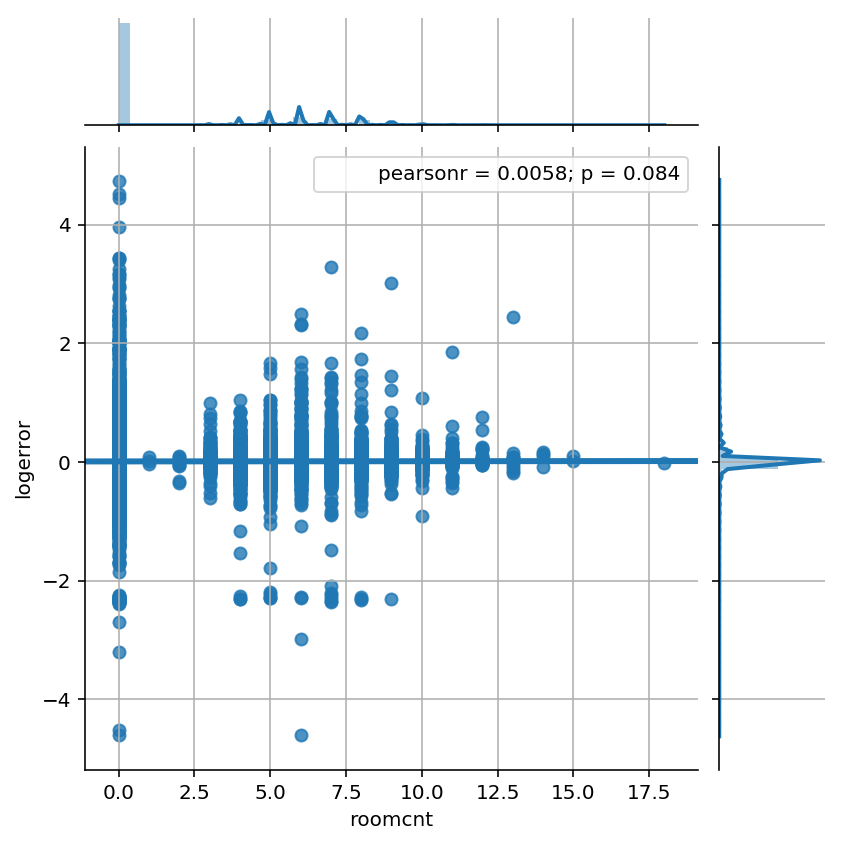

In [189]:
sns.jointplot(x=df['roomcnt'], y=df['logerror'], kind='reg')
plt.show()

In [190]:
categorical.append('roomcnt')

# bedroomcnt

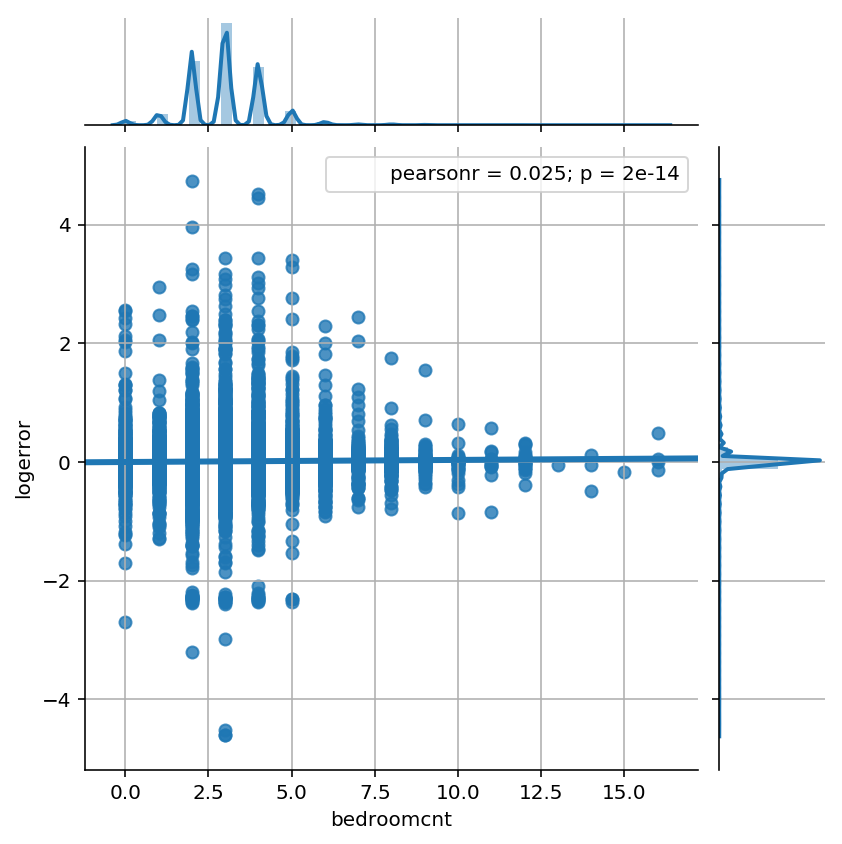

In [191]:
sns.jointplot(x=df['bedroomcnt'], y=df['logerror'], kind='reg')
plt.show()

In [192]:
categorical.append('bedroomcnt')

# assessmentyear

In [193]:
unique('assessmentyear')

0.0%
[2015.]
   assessmentyear  Counts
0          2015.0   90275


# transactiondate

In [194]:
df['transactiondate'].astype('datetime64').dt.month

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


parcelid
11016594     1
14366692     1
12098116     1
12643413     1
14432541     1
11509835     1
12286022     1
17177301     1
14739064     1
14677559     1
10854446     1
11672170     1
10949761     1
14665244     1
14148540     1
14057104     1
17296797     1
12524288     1
14091502     1
10815909     1
12453853     1
14253461     1
14001034     1
11458863     1
13957980     1
12752047     1
11188425     1
14646051     1
10805063     1
12524725     1
            ..
10757551    12
12558267    12
11710734    12
14347592    12
11341061    12
14027878    12
12756771    12
12758333    12
11295458    12
12757889    12
11308315    12
14353215    12
10753416    12
11756902    12
11994047    12
11440746    12
11703478    12
10965821    12
12067066    12
11683263    12
12062080    12
12265636    12
17109680    12
12268527    12
12920746    12
10774160    12
12046695    12
12995401    12
11402105    12
12566293    12
Name: transactiondate, Length: 90275, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


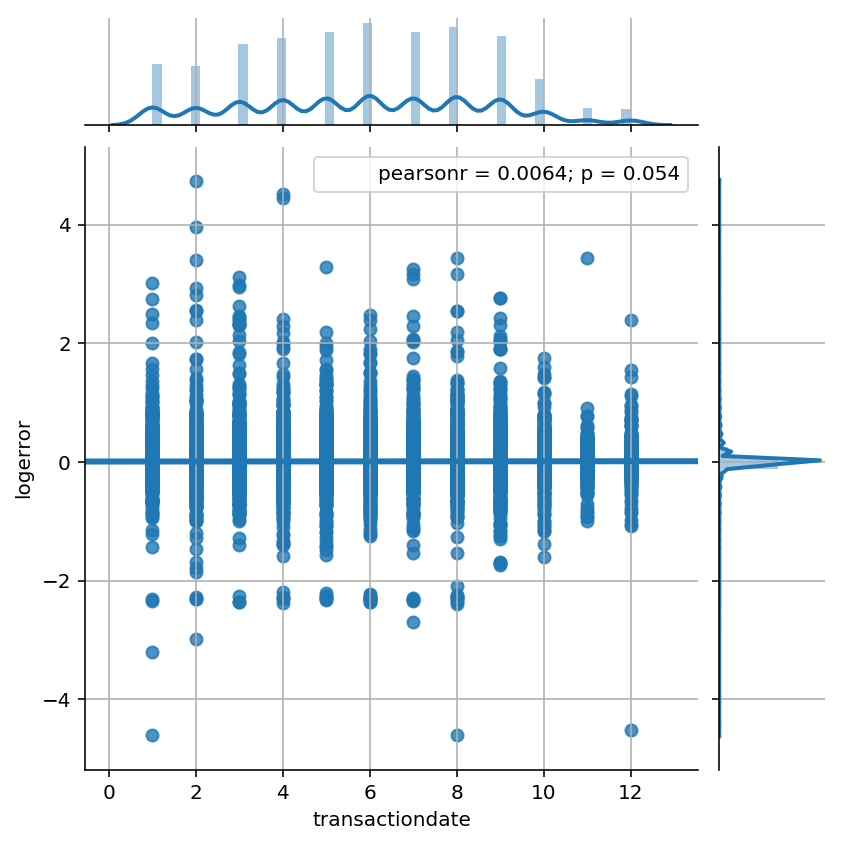

In [195]:
sns.jointplot(x=df['transactiondate'].astype('datetime64').dt.month, y=df['logerror'],kind='reg')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


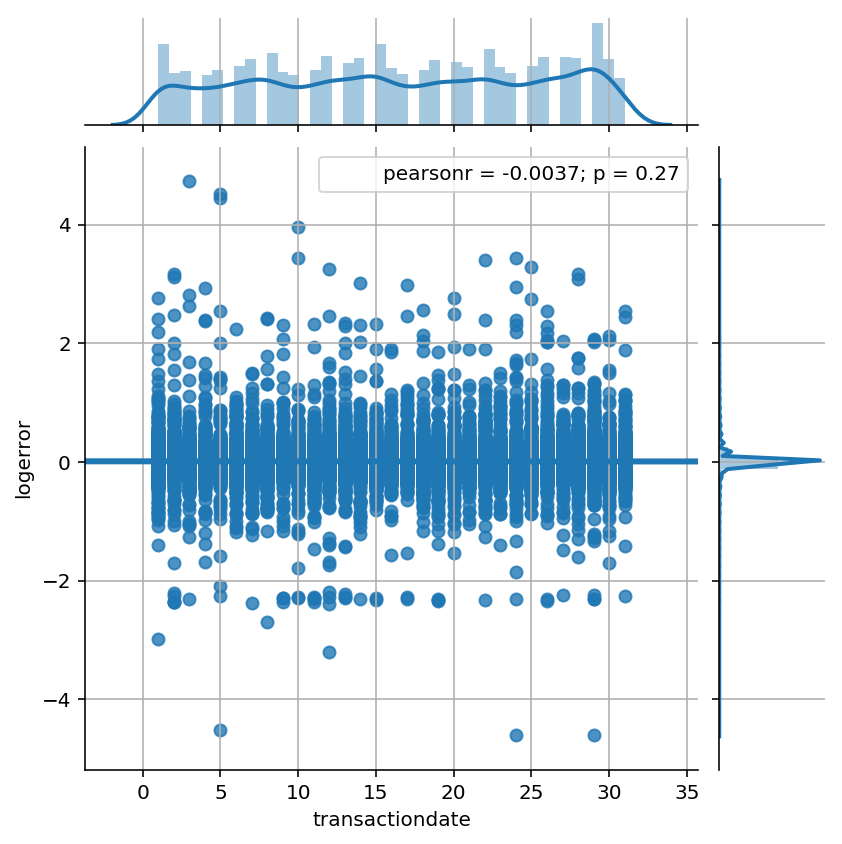

In [196]:
sns.jointplot(x=df['transactiondate'].astype('datetime64').dt.day, y=df['logerror'],kind='reg')
plt.show()

In [197]:
df['transactiondate'] = df['transactiondate'].astype('datetime64').dt.month

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [198]:
categorical.append('transactiondate')

In [199]:
len(numerical)

18

In [200]:
len(categorical)

28